#Final Project: Prediction of Travel Ticket Cancellation




##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

##Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/BOOTCAMP/Final Project/train_data.csv'
cancel = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Created               101017 non-null  object 
 1   CancelTime            15326 non-null   object 
 2   DepartureTime         101017 non-null  object 
 3   BillID                101017 non-null  int64  
 4   TicketID              101017 non-null  float64
 5   ReserveStatus         101017 non-null  int64  
 6   UserID                42543 non-null   float64
 7   Male                  101017 non-null  bool   
 8   Price                 101017 non-null  float64
 9   CouponDiscount        101017 non-null  float64
 10  From                  101017 non-null  object 
 11  To                    101017 non-null  object 
 12  Domestic              101017 non-null  int64  
 13  VehicleType           93473 non-null   object 
 14  VehicleClass          62567 non-null   object 
 15  

In [ ]:
cancel

Created CancelTime        DepartureTime    BillID  \
0       2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1       2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2       2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3       2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4       2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   
...                         ...        ...                  ...       ...   
101012  2022-06-01 00:20:14.280        NaN  2022-06-04 12:10:00  37579327   
101013  2022-10-29 20:54:31.330        NaN  2022-11-01 15:30:00  39789479   
101014  2022-09-03 17:57:22.067        NaN  2022-09-13 09:30:00  38991563   
101015  2022-09-29 13:15:51.303        NaN  2022-09-29 17:30:00  39406503   
101016  2022-03-31 13:29:11.530        NaN  2022-04-05 17:10:00  36742809   

         TicketID  ReserveStatus    UserID   Male       Price  CouponDiscount  \
0       1091777.0              5  122885.0   True   6600000.0         34425.0   
1       1070902.0              5  876925.0   True   9500000.0             0.0   
2       7624237.0              3  916640.0  False   2000000.0             0.0   
3       2867547.0              2       NaN  False     40000.0             0.0   
4       7212559.0              3       NaN   True   1130000.0             0.0   
...           ...            ...       ...    ...         ...             ...   
101012  1050781.0              5       NaN   True   5900000.0             0.0   
101013  3085407.0              2  403095.0   True    926500.0             0.0   
101014  2322052.0              5  528307.0   True  30000000.0             0.0   
101015  7664730.0              3  797946.0   True    980000.0             0.0   
101016  2711094.0              2       NaN   True   3168000.0             0.0   

        ... Domestic              VehicleType  VehicleClass TripReason  \
0       ...        1                      NaN         False       Work   
1       ...        1                      NaN         False        Int   
2       ...        1                  VIP 2+1          True       Work   
3       ...        1          3 ستاره اتوبوسي           NaN        Int   
4       ...        1  اسکانیا تک صندلی ۳۱نفره          True        Int   
...     ...      ...                      ...           ...        ...   
101012  ...        1               بوئینگ 737         False        Int   
101013  ...        1    4 ستاره اتوبوسي نگين            NaN       Work   
101014  ...        0                      NaN         False        Int   
101015  ...        1            25 نفره (VIP)          True       Work   
101016  ...        1       4 ستاره 4 تخته ارگ           NaN       Work   

                   Vehicle Cancel  \
0                    Plane      0   
1                    Plane      0   
2                      Bus      0   
3                    Train      0   
4                      Bus      0   
...                    ...    ...   
101012               Plane      0   
101013               Train      0   
101014  InternationalPlane      0   
101015                 Bus      0   
101016               Train      0   

                                     HashPassportNumber_p  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
101012                                                NaN   
101013                                                NaN   
101014  47b8f2d9b5de7e0e0e7234c18a1aa0c4b35798e6cb46b4...   
101015                                                NaN   
101016                                                NaN   

                                                HashEmail  

##Introduction of Dataset

The dataset contains various information about passengers who have registered for a trip through a travel booking website. Here is a description of the columns in the dataset:

Created: The timestamp indicates the ticket registration time.

CancelTime: The timestamp when the passenger canceled the ticket, if applicable.

DepartureTime: The scheduled departure time for the trip.

BillID: The unique identifier for the purchase transaction.

TicketID: The unique identifier for the ticket.

ReserveStatus: The payment status of the customer.

UserID: The unique identifier for the user.

Male: Indicates whether the ticket belongs to a male passenger or not.

Price: The ticket price without any discounts.

CouponDiscount: The discount applied by the passenger on the ticket.

From: The origin of the trip.

To: The destination of the trip.

Domestic: Indicates whether the trip is domestic or international.

VehicleType: Specifies details about the mode of transportation.

VehicleClass: Indicates whether the vehicle is first class or not.

Vehicle: Specifies the type of vehicle.

Cancel: Indicates whether the ticket has been canceled or not.

HashPassportNumber_p: Hashed version of the passport number.

HashEmail: Hashed version of the email address.

BuyerMobile: Hashed version of the buyer's mobile number.

NationalCode: Hashed version of the national identification number.

TripReason: The reason for the trip.

#Baseline

##Data Preprocessing

In [ ]:
cancel.head()

Created CancelTime        DepartureTime    BillID  \
0  2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1  2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2  2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3  2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4  2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   

    TicketID  ReserveStatus    UserID   Male      Price  CouponDiscount  ...  \
0  1091777.0              5  122885.0   True  6600000.0         34425.0  ...   
1  1070902.0              5  876925.0   True  9500000.0             0.0  ...   
2  7624237.0              3  916640.0  False  2000000.0             0.0  ...   
3  2867547.0              2       NaN  False    40000.0             0.0  ...   
4  7212559.0              3       NaN   True  1130000.0             0.0  ...   

  Domestic              VehicleType  VehicleClass TripReason Vehicle Cancel  \
0        1                      NaN         False       Work   Plane      0   
1        1                      NaN         False        Int   Plane      0   
2        1                  VIP 2+1          True       Work     Bus      0   
3        1          3 ستاره اتوبوسي           NaN        Int   Train      0   
4        1  اسکانیا تک صندلی ۳۱نفره          True        Int     Bus      0   

  HashPassportNumber_p                                          HashEmail  \
0                  NaN  66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...   
1                  NaN  b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...   
2                  NaN                                                NaN   
3                  NaN                                                NaN   
4                  NaN                                                NaN   

    BuyerMobile NationalCode  
0  764974891906    477368495  
1   27479149496     15987669  
2  323657282999    667640412  
3  169459057632    392476186  
4  408595008421     79497837  

[5 rows x 22 columns]

In [ ]:
cancel.isnull().sum()

Created                      0
CancelTime               85691
DepartureTime                0
BillID                       0
TicketID                     0
ReserveStatus                0
UserID                   58474
Male                         0
Price                        0
CouponDiscount               0
From                         0
To                           0
Domestic                     0
VehicleType               7544
VehicleClass             38450
TripReason                   0
Vehicle                      0
Cancel                       0
HashPassportNumber_p    100155
HashEmail                57933
BuyerMobile                  0
NationalCode                 0
dtype: int64

###Drop Effectless Columns

In [ ]:
#drop NationalCode, BuyerMobile, because provided in hashed version. it is difficult to process for machine learning and doesn’t effects cancellation.
#drop the VehicleType because the data is not provided well. The data for VehicleType should be categorical so that insights can be extracted.
cols = ['VehicleType','BuyerMobile','NationalCode']
df = cancel.drop(columns=cols)
df.head()

Created CancelTime        DepartureTime    BillID  \
0  2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1  2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2  2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3  2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4  2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   

    TicketID  ReserveStatus    UserID   Male      Price  CouponDiscount  \
0  1091777.0              5  122885.0   True  6600000.0         34425.0   
1  1070902.0              5  876925.0   True  9500000.0             0.0   
2  7624237.0              3  916640.0  False  2000000.0             0.0   
3  2867547.0              2       NaN  False    40000.0             0.0   
4  7212559.0              3       NaN   True  1130000.0             0.0   

    From                  To  Domestic VehicleClass TripReason Vehicle  \
0  گرگان               تهران         1        False       Work   Plane   
1   مشهد               تهران         1        False        Int   Plane   
2  شیراز               اهواز         1         True       Work     Bus   
3  تبریز                جلفا         1          NaN        Int   Train   
4  تهران  نجف آباد (اصفهان )         1         True        Int     Bus   

   Cancel HashPassportNumber_p  \
0       0                  NaN   
1       0                  NaN   
2       0                  NaN   
3       0                  NaN   
4       0                  NaN   

                                           HashEmail  
0  66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...  
1  b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...  
2                                                NaN  
3                                                NaN  
4                                                NaN

###Missing Values

In [ ]:
#check missing values
df.isnull().sum()

Created                      0
CancelTime               85691
DepartureTime                0
BillID                       0
TicketID                     0
ReserveStatus                0
UserID                   58474
Male                         0
Price                        0
CouponDiscount               0
From                         0
To                           0
Domestic                     0
VehicleClass             38450
TripReason                   0
Vehicle                      0
Cancel                       0
HashPassportNumber_p    100155
HashEmail                57933
dtype: int64

In [ ]:
#create dataframe for missing values information
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

feature  missing_value  percentage
0  HashPassportNumber_p         100155       99.15
1            CancelTime          85691       84.83
2                UserID          58474       57.89
3             HashEmail          57933       57.35
4          VehicleClass          38450       38.06

In [ ]:
#drop CancelTime, UserID, VehicleClass, HashPassportNumber_p and HashEmail because bringing many missing values
cols = ['CancelTime','UserID','VehicleClass','HashPassportNumber_p','HashEmail']
df = df.drop(columns=cols)

In [ ]:
#recheck missing values
df.isnull().sum()

Created           0
DepartureTime     0
BillID            0
TicketID          0
ReserveStatus     0
Male              0
Price             0
CouponDiscount    0
From              0
To                0
Domestic          0
TripReason        0
Vehicle           0
Cancel            0
dtype: int64

###Duplicated Rows

In [ ]:
#check duplicated rows
df.duplicated().sum()

2

In [ ]:
#there are 2 duplicated rows, drop.
df.drop_duplicates(inplace=True)

In [ ]:
#Recheck
df.duplicated().sum()

0

###Label Encoding

In [ ]:
#change 'Gender' data type to str for labeling
df['Male'] = df['Male'].astype(str)

#Labeling 'True' : 'Male' to 1, 'false' : 'Female' to 0
label = {'True' : 1,
         'False' : 0}
df['Male'] = df['Male'].map(label).astype(int)

In [ ]:
#Label Encoding 'TripReason' 'Work' : 1, 'Int' : 0
reason = {
    'Work' : 1,
    'Int' : 0
}
df['TripReason'] = df['TripReason'].map(reason).astype(int)

###Changing Data Type

In [ ]:
#changing data type for TicketID, Price, CouponDiscount from float to int
num = ['Price', 'CouponDiscount', 'TicketID']
for i in num:
  df[i] = df[i].astype(int)

###Feature Engineering

In [ ]:
# Combine 'From' and 'To' columns to create a list of all cities
all_cities = df['From'].tolist() + df['To'].tolist()

# Create a set of unique cities and convert it back to a list
unique_cities = list(set(all_cities))

city_encoder = LabelEncoder()

# Fit the encoder on the unique cities
city_encoder.fit(unique_cities)

# Transform the 'From' and 'To' columns in the training data
df['From_encoded'] = city_encoder.transform(df['From'])
df['To_encoded'] = city_encoder.transform(df['To'])

# Fill missing values with -1
df['From_encoded'].fillna(-1, inplace=True)
df['To_encoded'].fillna(-1, inplace=True)

# Transform the 'From' and 'To' columns in the validation data
df['From_encoded'] = city_encoder.transform(df['From'])
df['To_encoded'] = city_encoder.transform(df['To'])

# Fill missing values with -1
df['From_encoded'].fillna(-1, inplace=True)
df['To_encoded'].fillna(-1, inplace=True)

###Renaming Column

In [ ]:
#rename column 'Male' to 'Gender'
df.rename(columns={'Male':'Gender'}, inplace=True)

##Exploratory Data Analysis

###Statistical Summary

####Numerical Summary

In [ ]:
df.head()

Created        DepartureTime    BillID  TicketID  \
0  2022-10-23 09:38:49.110  2022-11-02 23:59:00  39710203   1091777   
1  2022-08-15 14:51:43.160  2022-08-18 04:15:00  38689463   1070902   
2  2022-09-20 17:25:27.250  2022-09-21 11:00:00  39245173   7624237   
3  2022-06-25 11:32:53.980  2022-06-26 08:30:00  37957585   2867547   
4  2022-06-01 11:30:53.633  2022-06-02 23:00:00  37584530   7212559   

   ReserveStatus  Gender    Price  CouponDiscount   From                  To  \
0              5       1  6600000           34425  گرگان               تهران   
1              5       1  9500000               0   مشهد               تهران   
2              3       0  2000000               0  شیراز               اهواز   
3              2       0    40000               0  تبریز                جلفا   
4              3       1  1130000               0  تهران  نجف آباد (اصفهان )   

   Domestic  TripReason Vehicle  Cancel  From_encoded  To_encoded  
0         1           1   Plane       0           307          85  
1         1           0   Plane       0           234          85  
2         1           1     Bus       0           182          41  
3         1           0   Train       0            79          90  
4         1           0     Bus       0            85         256

In [ ]:
#group column names based on type
categoricals = ['ReserveStatus','Gender','From','To','Domestic','TripReason','Vehicle','Cancel']
numericals = ['Price','CouponDiscount']

In [ ]:
#numeric statistical summary
df[numericals].describe()

Price  CouponDiscount
count  1.010150e+05    1.010150e+05
mean   3.203230e+06    4.776471e+03
std    7.349261e+06    6.127761e+04
min   -1.514000e+06   -2.000000e+03
25%    1.075000e+06    0.000000e+00
50%    1.690000e+06    0.000000e+00
75%    3.043500e+06    0.000000e+00
max    3.837646e+08    1.443333e+07

In [ ]:
#From the minimum row, there is a '-' sign in the 'Price' and 'CouponDiscount' columns. The '-' sign should not be present in these columns.
#To address this, remove the '-' sign from the 'Price' and 'CouponDiscount' columns.
sub_string = ['Price', 'CouponDiscount']
for i in sub_string:
  df[i] = pd.to_numeric(df[i].astype(str).str.replace('-', ''))

In [ ]:
#double check numerical summary
df[numericals].describe()

Price  CouponDiscount
count  1.010150e+05    1.010150e+05
mean   3.203260e+06    4.776510e+03
std    7.349247e+06    6.127761e+04
min    0.000000e+00    0.000000e+00
25%    1.075000e+06    0.000000e+00
50%    1.690000e+06    0.000000e+00
75%    3.043500e+06    0.000000e+00
max    3.837646e+08    1.443333e+07

In [ ]:
#double check numerical summary
price_min = df['Price']<0
discount_min = df['CouponDiscount']<0
merge_cond = price_min | discount_min
df[merge_cond]

Empty DataFrame
Columns: [Created, DepartureTime, BillID, TicketID, ReserveStatus, Gender, Price, CouponDiscount, From, To, Domestic, TripReason, Vehicle, Cancel, From_encoded, To_encoded]
Index: []

In [ ]:
#drop rows where the 'Price' is zero; it shouldn't be zero
price_nul = df[df['Price']<=0].index
df = df.drop(price_nul)

In [ ]:
#double check numerical summary
df['Price'].describe()

count    1.010140e+05
mean     3.203291e+06
std      7.349277e+06
min      4.000000e+04
25%      1.075000e+06
50%      1.690000e+06
75%      3.043500e+06
max      3.837646e+08
Name: Price, dtype: float64

In [ ]:
#double check
df[df['Price']<=0]

Empty DataFrame
Columns: [Created, DepartureTime, BillID, TicketID, ReserveStatus, Gender, Price, CouponDiscount, From, To, Domestic, TripReason, Vehicle, Cancel, From_encoded, To_encoded]
Index: []

####Categorical Summary

In [ ]:
# value counts categoricals columns
for x in categoricals:
  print(f"Value counts of {x} column")
  print(df[x].value_counts(), '\n')

Value counts of ReserveStatus column
3    42457
2    31351
5    20108
4     7098
Name: ReserveStatus, dtype: int64 

Value counts of Gender column
1    61743
0    39271
Name: Gender, dtype: int64 

Value counts of From column
تهران      29518
مشهد       11420
اصفهان      9473
شیراز       6332
یزد         3755
           ...  
فلورانس        1
ماسال          1
ونیز           1
لیسبون         1
آلانیا         1
Name: From, Length: 226, dtype: int64 

Value counts of To column
تهران      29684
مشهد       13242
اصفهان      6956
شیراز       4839
یزد         3657
           ...  
زوریخ          1
دهلران         1
صوفیه          1
نایروبی        1
دوربان         1
Name: To, Length: 307, dtype: int64 

Value counts of Domestic column
1    100219
0       795
Name: Domestic, dtype: int64 

Value counts of TripReason column
1    56448
0    44566
Name: TripReason, dtype: int64 

Value counts of Vehicle column
Bus                   48959
Train                 38449
Plane                 12811
Inter

###Univariate Analysis

####Cancellation vs Non-Cancellation

In [ ]:
cancel_count = df.groupby(['Cancel']).agg(
    count = ('Cancel', 'count')
)
cancel_count

count
Cancel       
0       85699
1       15315

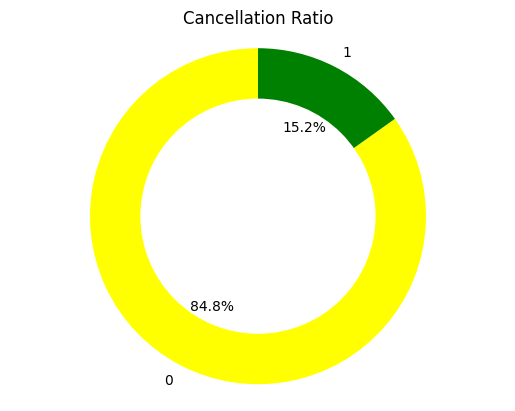

In [ ]:
# Extracting data for the pie chart
labels = cancel_count.index
sizes = cancel_count['count']

# Colors for each section
colors = ['yellow', 'green']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.title('Cancellation Ratio')
plt.show()

Cancel Ratio:

Cancel = 15,2%

Non-Cancellation = 84,8%

####10 Most Departure Cities

In [ ]:
from_count = df[df['Cancel']==1].groupby(['From']).agg(
    count = ('From', 'count')
)
from_sort = from_count.sort_values(by='count', ascending=False).reset_index().head(10)
from_sort

From  count
0           تهران   4587
1            مشهد   2202
2          اصفهان   1365
3           شیراز    738
4             یزد    634
5           اهواز    608
6  مشهد (خراسان )    454
7           کرمان    406
8        بندرعباس    330
9           تبریز    261

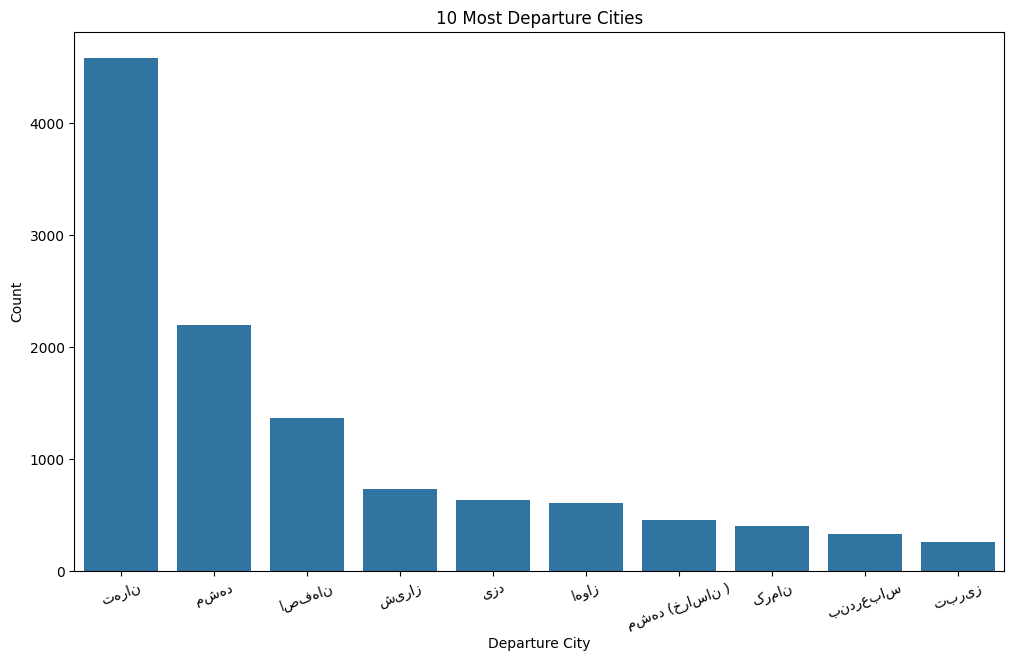

In [ ]:
#10 kota keberangkatan terbanyak
plt.figure(figsize=(12,7))
sns.barplot(data=from_sort,
              x='From',
              y='count'
            )
plt.title('10 Most Departure Cities')
plt.xlabel('Departure City')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

10 Most Departure Cities:
1. تهران = Tehran
2. مشهد = Mashhad
3. اصفهان	= Isfahan
4. شیراز = Shiraz
5. یزد = Yazd
6. مشهد (خراسان )	= Mashhad(Greater Khorasan)
7. اهواز = Ahvaz
8. کرمان = Kerman
9. قم = Qom
10. بندرعباس = Bandar Abbas


####10 Most Destination Cities

In [ ]:
#10 kota kedatangan terbanyak
to_count = df.groupby(['To'],as_index=False).size()
to_sort = to_count.sort_values(by='size', ascending=False).head(10)
to_sort = to_sort.reset_index().drop(columns='index')
to_sort

To   size
0           تهران  29684
1            مشهد  13242
2          اصفهان   6956
3           شیراز   4839
4             یزد   3657
5              قم   3230
6  مشهد (خراسان )   2910
7           اهواز   2621
8           کرمان   2298
9           تبریز   2278

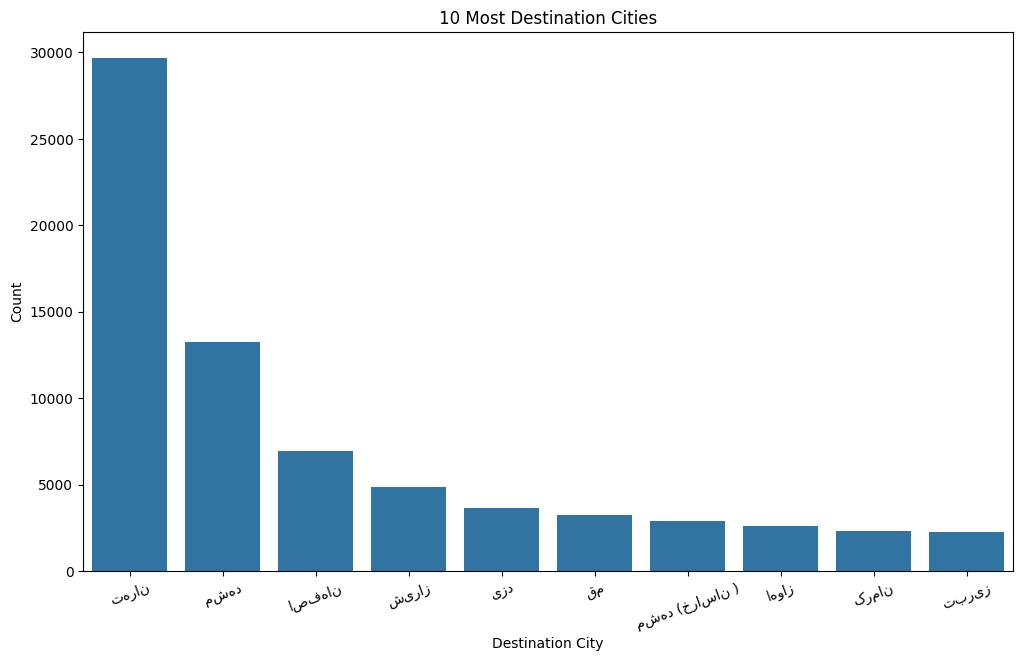

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(data=to_sort,
              x='To',
              y='size'
            )
plt.title('10 Most Destination Cities')
plt.xlabel('Destination City')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

10 Most Destination Cities:
1. تهران = Tehran
2. مشهد = Mashhad
3. اصفهان = Isfahan
4. شیراز = Shiraz
5. یزد  = Yazd
6. قم = Qom
7. مشهد (خراسان )	= Mashhad (Greater Khorasan)
8. اهواز = Ahvaz
9. کرمان = Kerman
10. تبریز = Tabriz

####Monthly Income

In [ ]:
#weekly income from selling ticket, ignoring cancellation
df['Created'] = pd.to_datetime(df['Created'])

#group by week per month, sum of prices - coupon discount
monthly_income = (
    df.resample('M', on='Created')
    .agg({'Price': 'sum', 'CouponDiscount': 'sum'})
    .reset_index()
)

# Calculate the difference and create a new column 'Income'
monthly_income['Income'] = monthly_income['Price'] - monthly_income['CouponDiscount']
monthly_income

Created        Price  CouponDiscount       Income
0  2022-01-31     56563160          182200     56380960
1  2022-02-28  11345612332        16906716  11328705616
2  2022-03-31  15633303828        16710531  15616593297
3  2022-04-30  17367007919        25105835  17341902084
4  2022-05-31  27308172059        58275441  27249896618
5  2022-06-30  25986251631        42767365  25943484266
6  2022-07-31  42927604133        48719510  42878884623
7  2022-08-31  66252926089       105037841  66147888248
8  2022-09-30  59408044295        91093348  59316950947
9  2022-10-31  53524825765        73835308  53450990457
10 2022-11-30   3766959742         3865103   3763094639

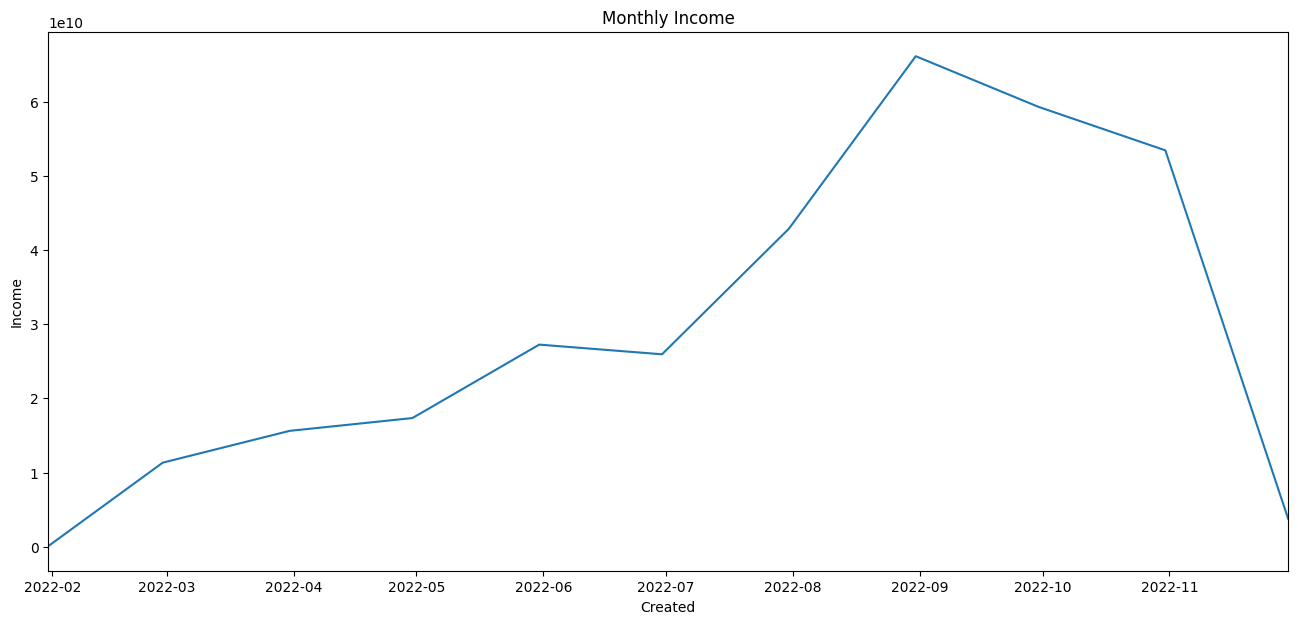

In [ ]:
plt.figure(figsize=(16,7))
sns.lineplot(data=monthly_income,
             x = 'Created',
             y = 'Income'
              )
plt.title('Monthly Income')

# Set x-axis limits based on the minimum and maximum week values
plt.xlim(monthly_income['Created'].min(), monthly_income['Created'].max())
plt.show()

In [ ]:
#group by month, sum of prices - coupon discount
monthly_income_2 = (
    df[df['Cancel']==0].resample('M', on='Created')
    .agg({'Price': 'sum', 'CouponDiscount': 'sum'})
    .reset_index()
)

# Calculate the difference and create a new column 'Income'
monthly_income_2['Income'] = monthly_income_2['Price'] - monthly_income_2['CouponDiscount']
monthly_income_2

Created        Price  CouponDiscount       Income
0  2022-01-31     48030660          182200     47848460
1  2022-02-28   9816977111        14868466   9802108645
2  2022-03-31  13687163662        15521188  13671642474
3  2022-04-30  15452403686        23159841  15429243845
4  2022-05-31  23543337879        50318960  23493018919
5  2022-06-30  23036205531        37265947  22998939584
6  2022-07-31  37141778703        42450620  37099328083
7  2022-08-31  55724996243        82203137  55642793106
8  2022-09-30  48321210172        76479535  48244730637
9  2022-10-31  46921887461        63847085  46858040376
10 2022-11-30   3631813742         3789698   3628024044

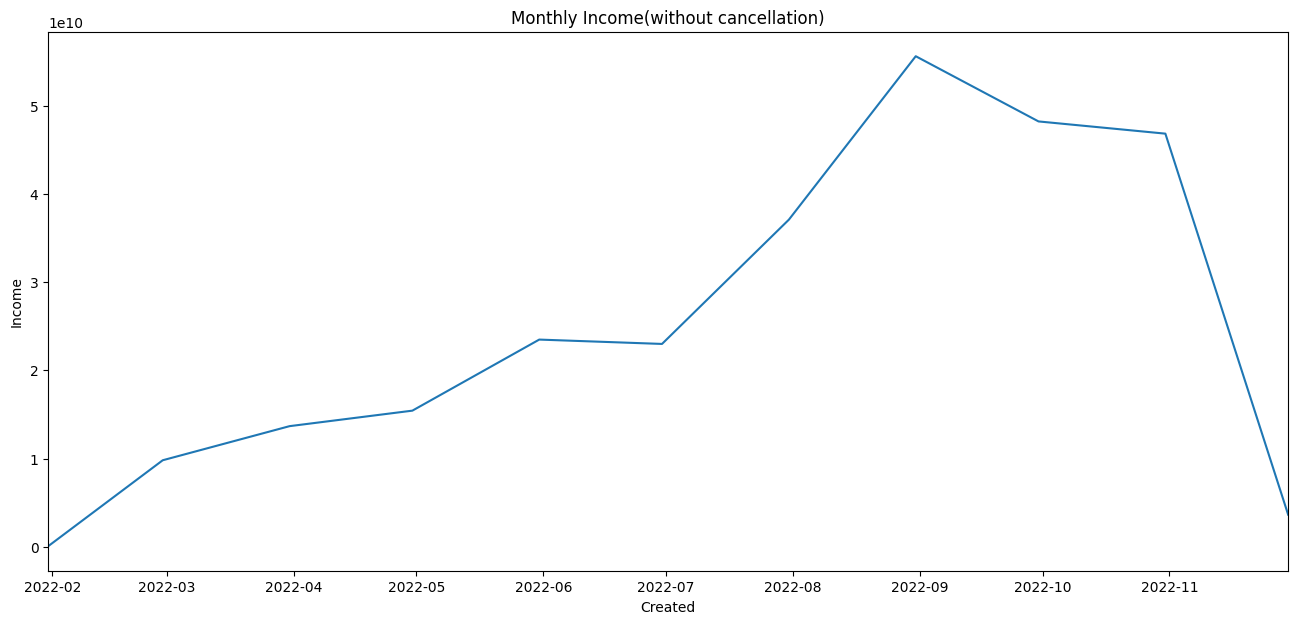

In [ ]:
plt.figure(figsize=(16,7))
sns.lineplot(data=monthly_income_2,
             x = 'Created',
             y = 'Income'
              )
plt.title('Monthly Income(without cancellation)')

# Set x-axis limits based on the minimum and maximum week values
plt.xlim(monthly_income_2['Created'].min(), monthly_income_2['Created'].max())
plt.show()

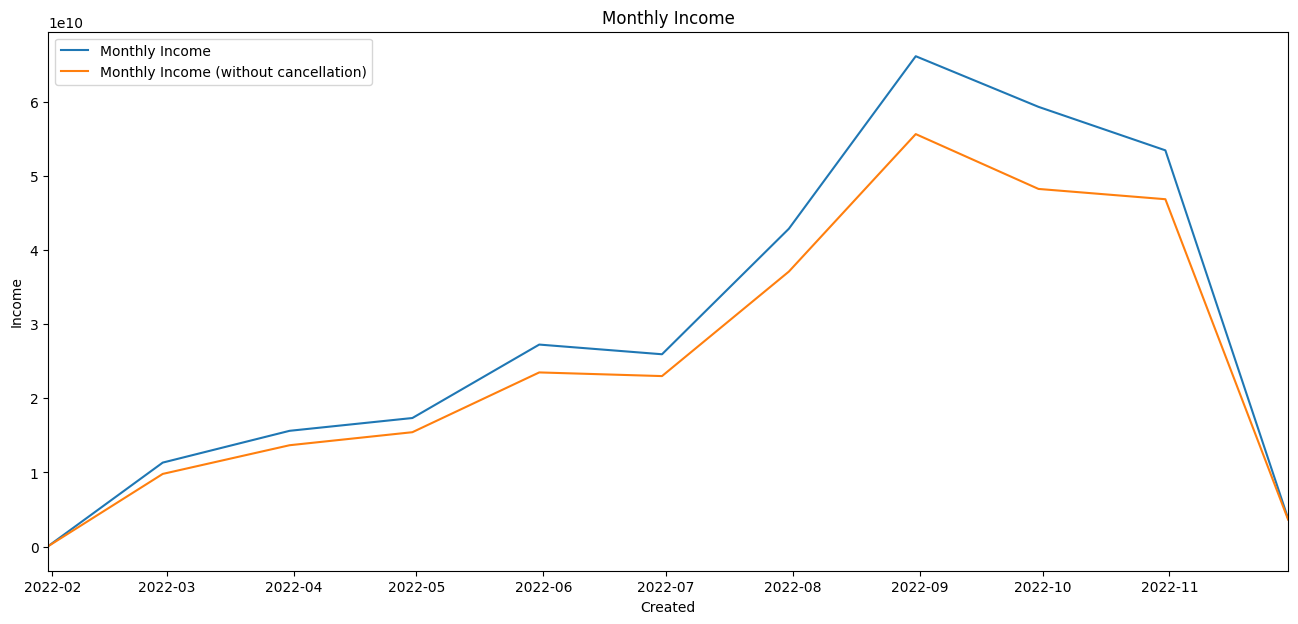

In [ ]:
plt.figure(figsize=(16, 7))

# Plot the first line plot
sns.lineplot(data=monthly_income, x='Created', y='Income', label='Monthly Income')
# Plot the second line plot on the same axes
sns.lineplot(data=monthly_income_2, x='Created', y='Income', label='Monthly Income (without cancellation)')

plt.title('Monthly Income')
plt.xlim(monthly_income['Created'].min(), monthly_income['Created'].max())
plt.legend()
plt.show()

####Boxplot to detect outliers

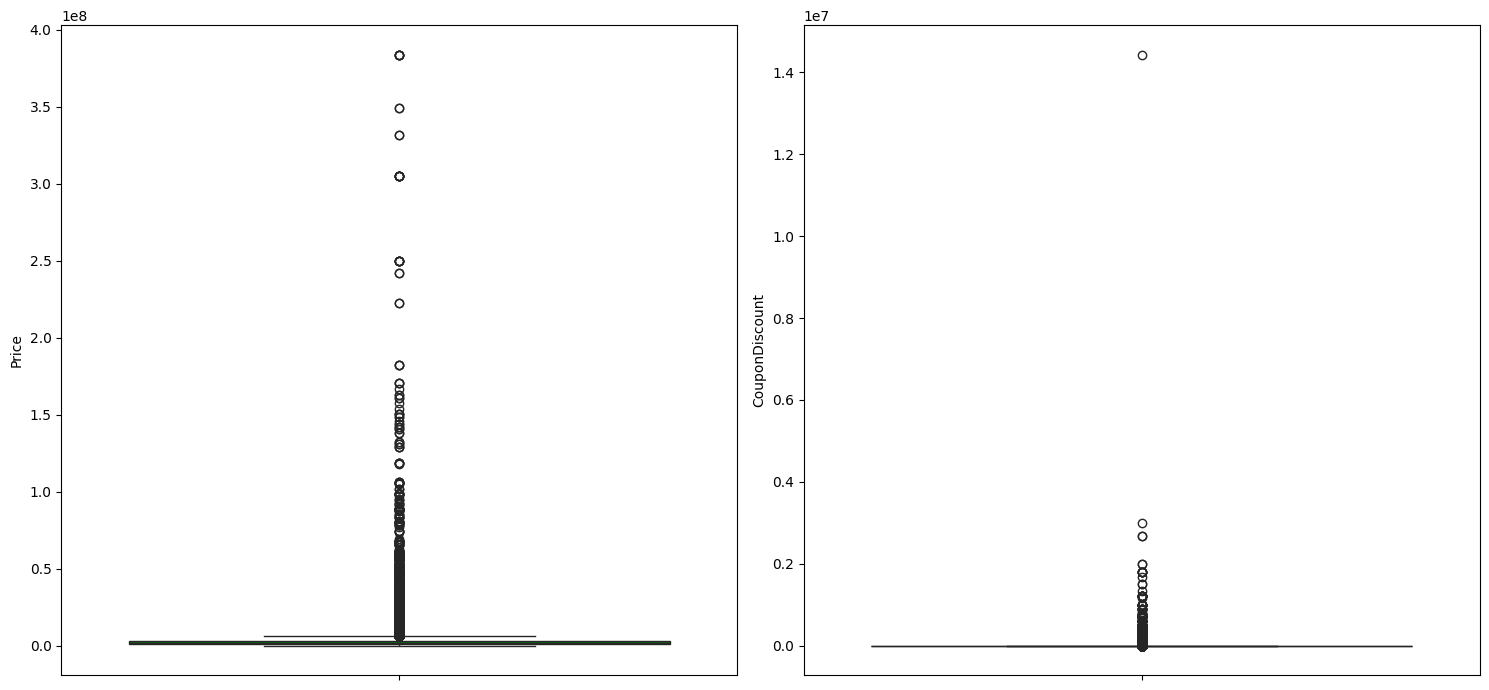

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=numericals[i],data=df,color='green')
    plt.tight_layout()

Possible to have outliers, requires further processing. But for the baseline, let's leave it as it is

####KDE plot for knowing the distribution form

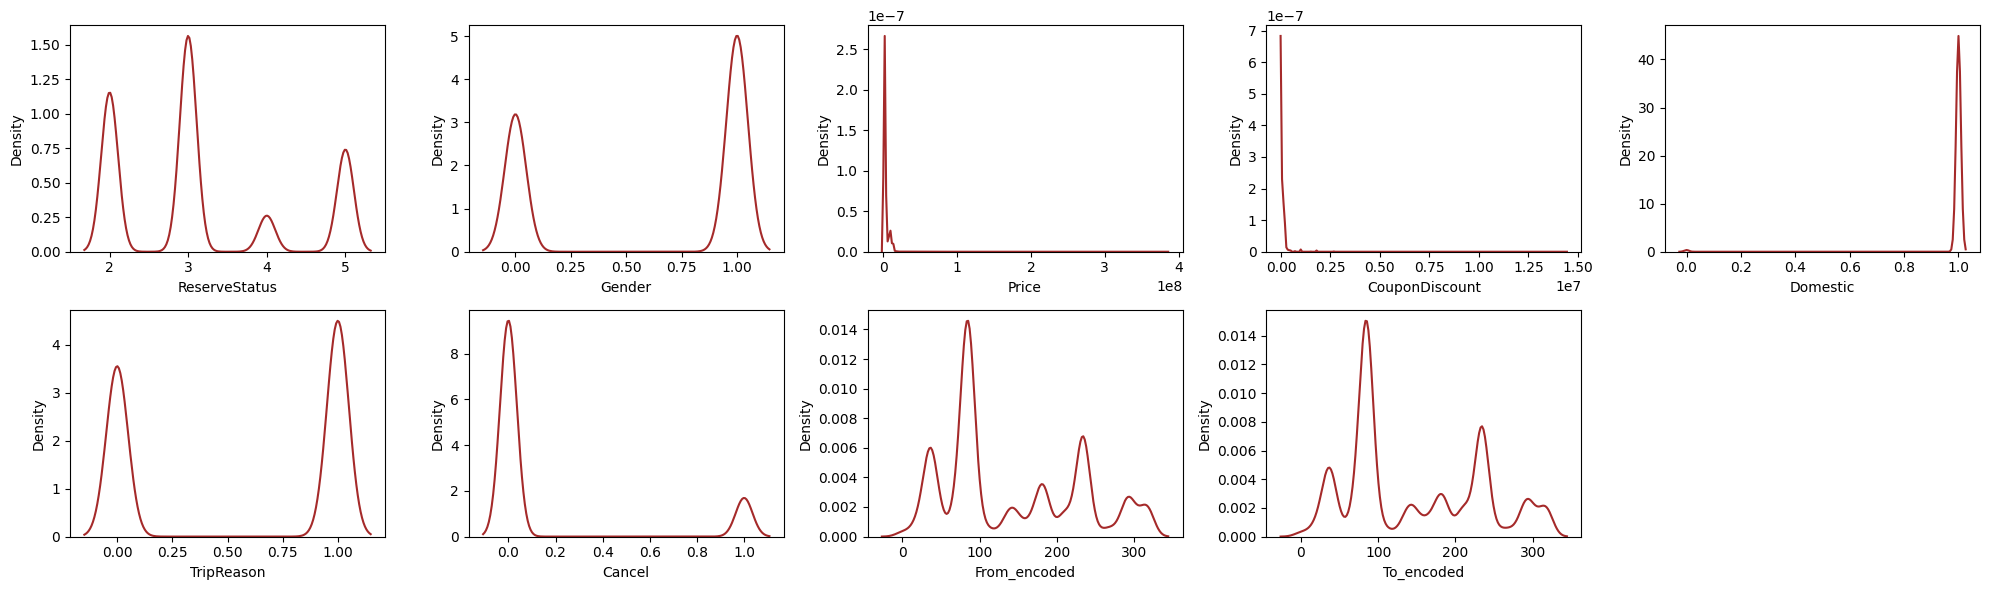

In [ ]:
#adjust the figure size for better readability
plt.figure(figsize=(20,6))

features = ['ReserveStatus','Gender','Price','CouponDiscount','Domestic','TripReason','Cancel','From_encoded','To_encoded']

for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='brown')
    plt.xlabel(features[i])
    plt.tight_layout()

some plot are not symmetrical. Especially on the 'Cancel' plot the data is imbalanced, requires further preprocessing before modelling.

###Bivariate Analysis

####Top 20 Cancellations From Days Difference


In [ ]:
df['DepartureTime'] = pd.to_datetime(df['DepartureTime'])
df['Created'] = pd.to_datetime(df['Created'])
df['Days_Difference'] = (df['DepartureTime'] - df['Created']).dt.days

In [ ]:
test_1 = df[df['Cancel']==1].groupby(['Days_Difference']).agg(
    count = ('Cancel', 'count')
).sort_values('count', ascending=False).head(20)
test_1

count
Days_Difference       
0                 2226
1                 1965
2                 1418
3                 1113
4                  948
5                  885
6                  678
7                  646
8                  563
9                  489
10                 442
11                 423
13                 336
12                 313
14                 263
15                 226
18                 211
16                 209
17                 200
19                 173

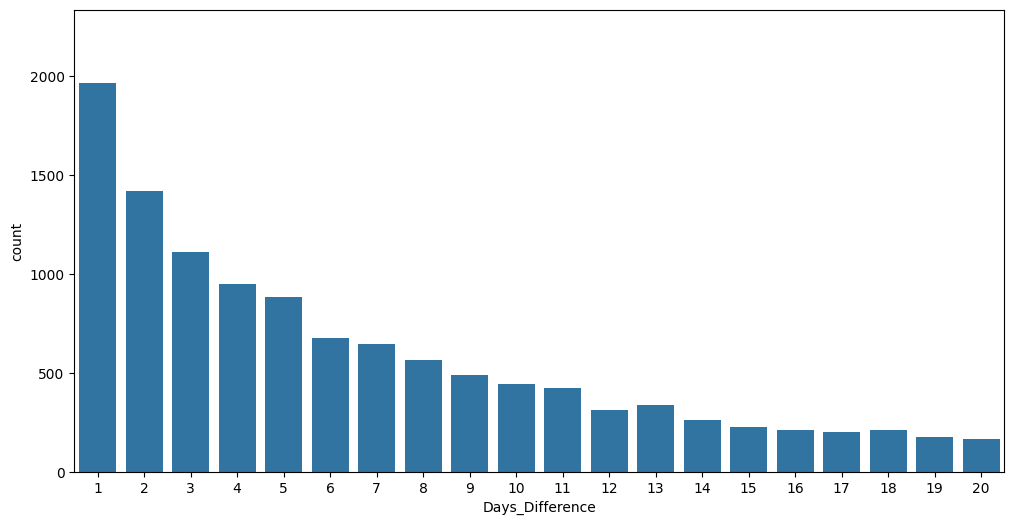

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Cancel']==1],
              x='Days_Difference'
              )
plt.xlim(0.5,20.5)
plt.show()

####Cancellation and Trip Reason

<Axes: xlabel='TripReason', ylabel='count'>

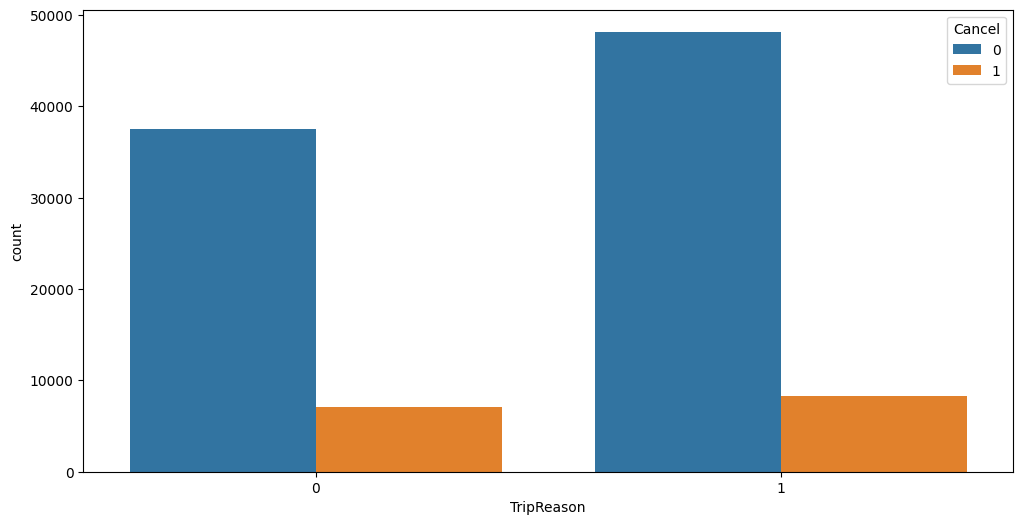

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              x='TripReason',
              hue='Cancel')

####Vehicle and Trip Reason

Text(0.5, 1.0, 'Vehicle and Trip Reason')

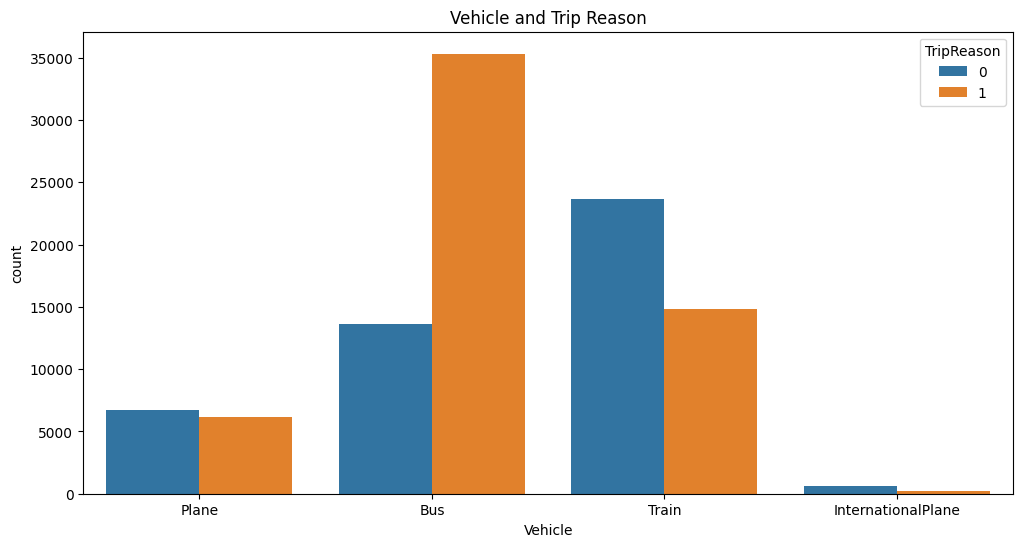

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
            x='Vehicle',
            hue='TripReason')
plt.title('Vehicle and Trip Reason')

####Vehicle and Cancellations







Text(0.5, 1.0, 'Vehicle and Cancellations')

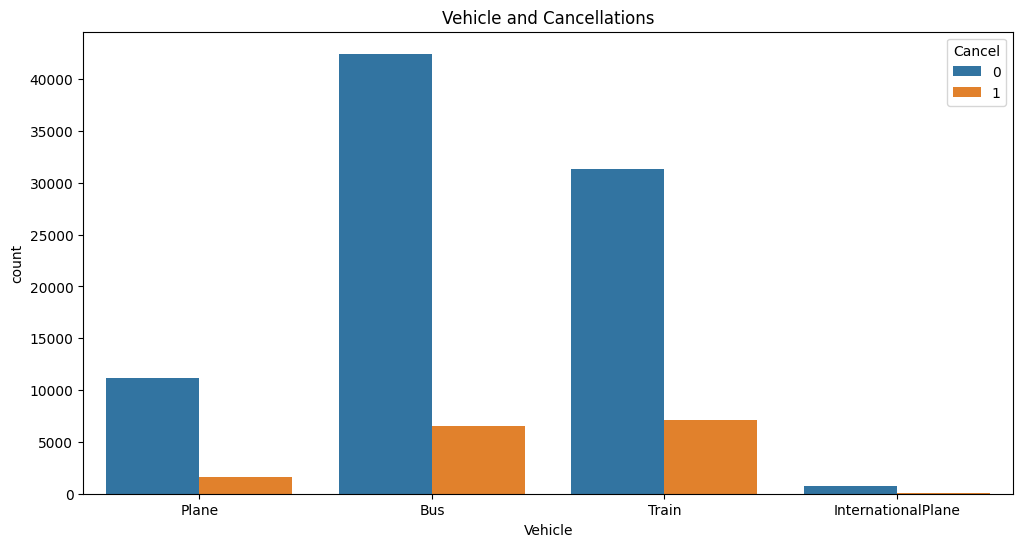

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              x='Vehicle',
              hue='Cancel')
plt.title('Vehicle and Cancellations')

####Gender and Cancellation

Text(0.5, 1.0, 'Gender and Cancellations')

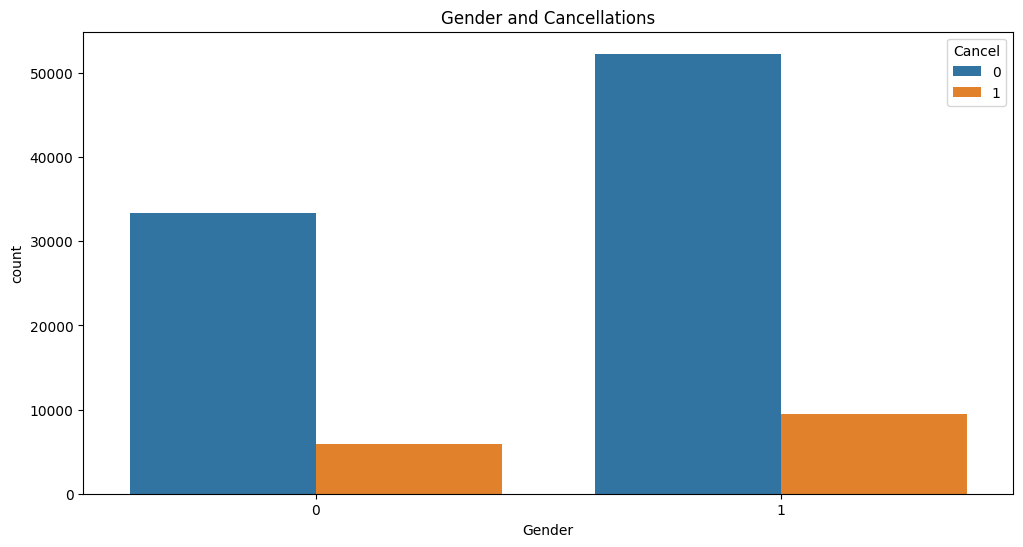

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              x='Gender',
              hue='Cancel')
plt.title('Gender and Cancellations')

####Correlation Heatmap

<ipython-input-50-f35beed64e3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


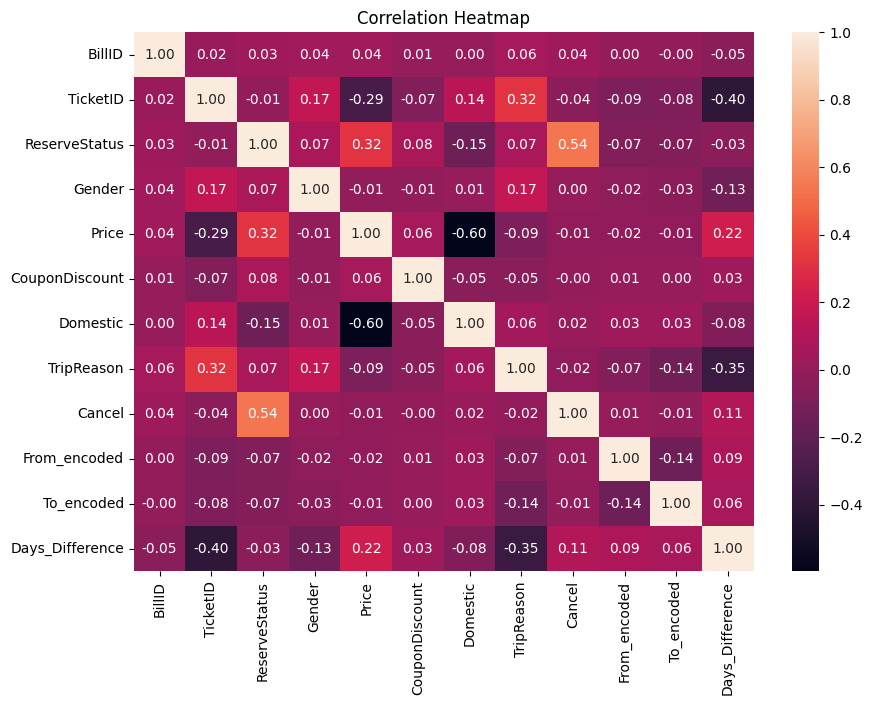

In [ ]:
# heatmap correlation
corr = df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

There is no high correlation among the features or between the features and the target. The highest correlation, 0.6, is between 'Domestic' and 'Price', which is still acceptable.

###Multivariate Analysis



####Pairplot

CPU times: user 10min 24s, sys: 39.2 s, total: 11min 3s
Wall time: 10min 42s


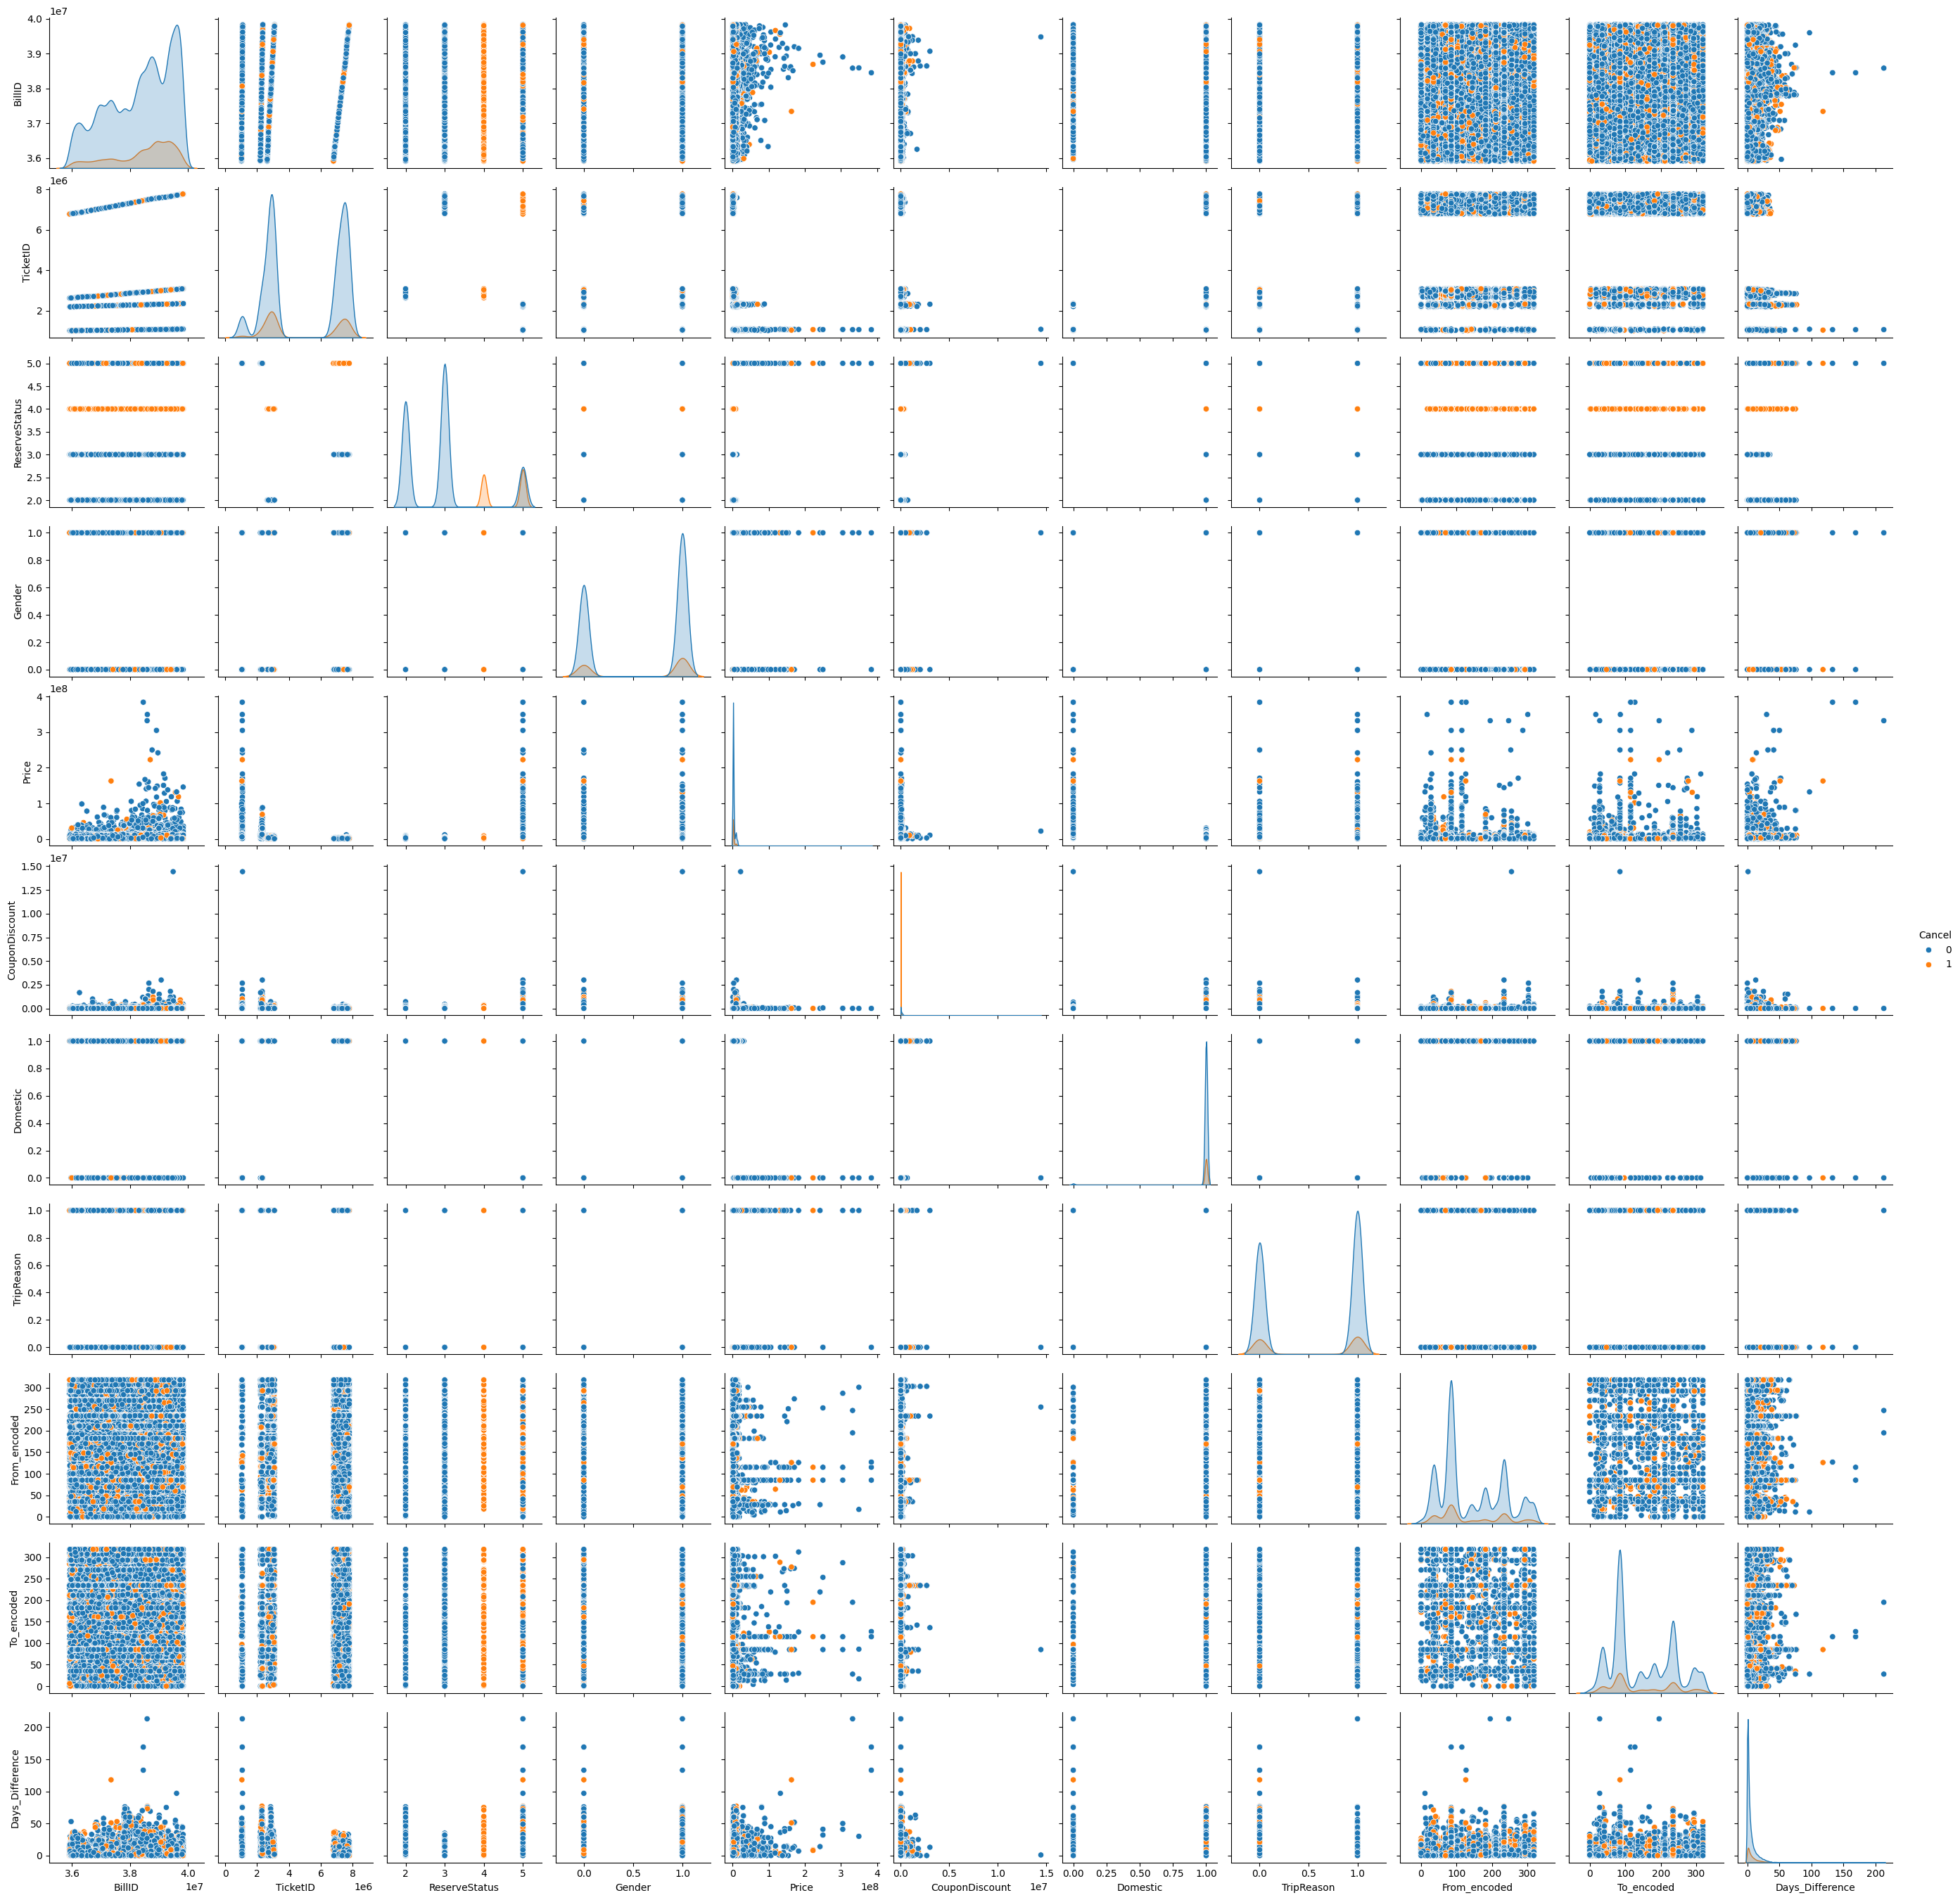

In [ ]:
#pairplot of the data
%%time
sns.pairplot(df, hue='Cancel')

###EDA Conclusion

1. The dataset contains numerous missing values in several columns ranging from 30% to almost 100%.
2. Numeric columns exhibit numerous outliers and lack symmetry, necessitating further preprocessing.
3. Minimum values in numeric columns seem illogical as they include negative values.
4. The KDE plot indicates significant skewness in 'Cancel'; undersampling is required.
5. The correlation heatmap reveals no features with high correlation, as the highest correlation observed is not more than 0.8.

###Deep Dive EDA

####Which month of departure has the highest cancellation rate?

In [ ]:
# Assuming 'DepartureTime' is in datetime format
df['DepartureTime'] = pd.to_datetime(df['DepartureTime'])

# Extract month from 'DepartureTime'
df['DepartureMonth'] = df['DepartureTime'].dt.month

#Count cancellations per month
cancellation_count_per_month = df[df['Cancel']==1].groupby(['DepartureMonth']).agg(
    cancel_count = ('Cancel', 'count')
).sort_values('cancel_count', ascending=False)
cancellation_count_per_month

cancel_count
DepartureMonth              
9                       3954
10                      2915
8                       2292
7                       1614
5                       1103
3                        929
6                        927
4                        808
2                        430
11                       343

Text(0.5, 1.0, 'Departure Month and Cancellation')

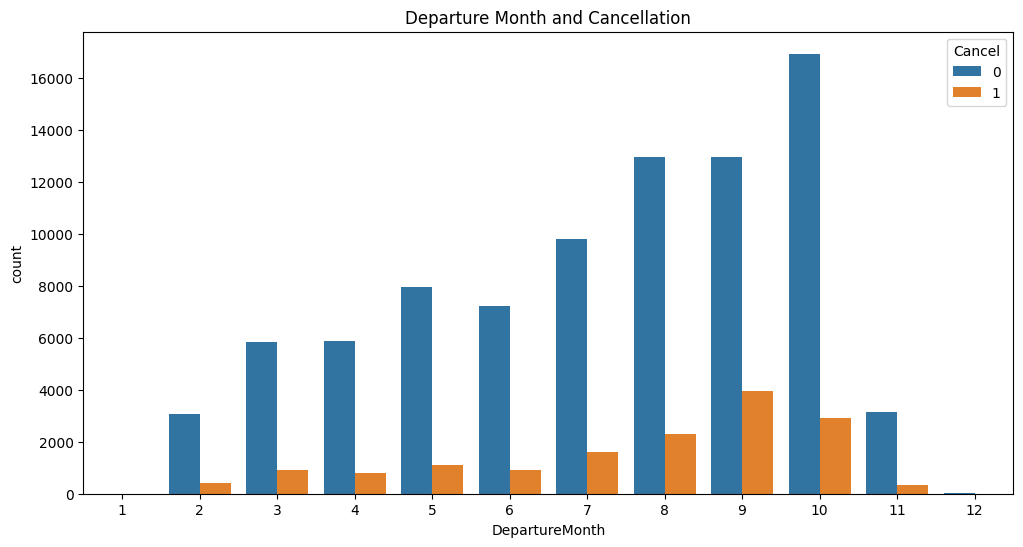

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
            x='DepartureMonth',
            hue='Cancel')
plt.title('Departure Month and Cancellation')

####Which month of departure has the highest discount rate?

In [ ]:
df.groupby(['DepartureMonth','Cancel']).agg(
    count_discount = ('CouponDiscount', lambda x: (x != 0).sum())
).sort_values('count_discount',ascending=False).head(15)

count_discount
DepartureMonth Cancel                
10             0                  900
8              0                  813
9              0                  812
7              0                  561
5              0                  500
6              0                  458
4              0                  356
3              0                  287
11             0                  224
9              1                  222
2              0                  197
10             1                  153
8              1                  143
7              1                   91
5              1                   74

####15 Highest Prices On One Ticket

In [ ]:
#highest price in one trip
high_price = df.groupby(['TicketID','Cancel']).agg(
    highest = ('Price', 'max'),
    count_trip = ('From','count')
).sort_values('highest', ascending=False).head(15)
high_price

highest  count_trip
TicketID Cancel                       
1066311  0       383764590           2
1066310  0       383764590           3
1068578  0       349325670           2
1068426  0       331948620           2
1075083  0       304735180           4
1075070  0       304735180           3
1072319  0       249883090           3
1072318  0       249883090           3
1076211  0       241830360           1
1076212  0       241830360           1
1070991  1       222463610           2
1079954  0       182551440           3
1080843  0       170679900           3
1067176  0       166892400           1
1044833  1       162823110           2

####Relationship between Discount, and Cancellation



In [ ]:
df['coupondiscount_percent'] = (df['CouponDiscount']/df['Price'])*100

In [ ]:
df[df['coupondiscount_percent']<100].groupby(['coupondiscount_percent','Cancel']).agg(
    count = ('Cancel','count')
).sort_values('count',ascending=False).head(15)

count
coupondiscount_percent Cancel       
0.000000               0       80588
                       1       14411
3.000000               0         170
5.000000               0          55
1.500000               0          49
3.000000               1          38
35.714286              0          36
1.144794               0          34
1.147497               0          29
0.300000               0          26
1.000000               0          24
6.000000               0          22
1.308341               0          21
0.600000               0          20
9.954479               0          18

In [ ]:
#discount count per cancellation
discount = df.groupby(['Cancel']).agg(
    count_discount_nonzero = ('CouponDiscount', lambda x: (x != 0).sum()),
    count_discount_zero = ('CouponDiscount', lambda x: (x == 0).sum()),
    count = ('Cancel', 'count')
).sort_values('count', ascending=False)
discount

count_discount_nonzero  count_discount_zero  count
Cancel                                                    
0                         5111                80588  85699
1                          904                14411  15315

####Top 10 Cancelled City for Destination

In [ ]:
df[df['Cancel']==1].groupby(['To']).agg(
                            cancel_count = ('Cancel','count')
).sort_values('cancel_count',ascending=False).head(10)

cancel_count
To                          
تهران                   4824
مشهد                    2340
اصفهان                  1009
اهواز                    560
شیراز                    555
یزد                      542
مشهد (خراسان )           395
کرمان                    360
تبریز                    313
بندرعباس                 285

Text(0.5, 0, 'Destination')

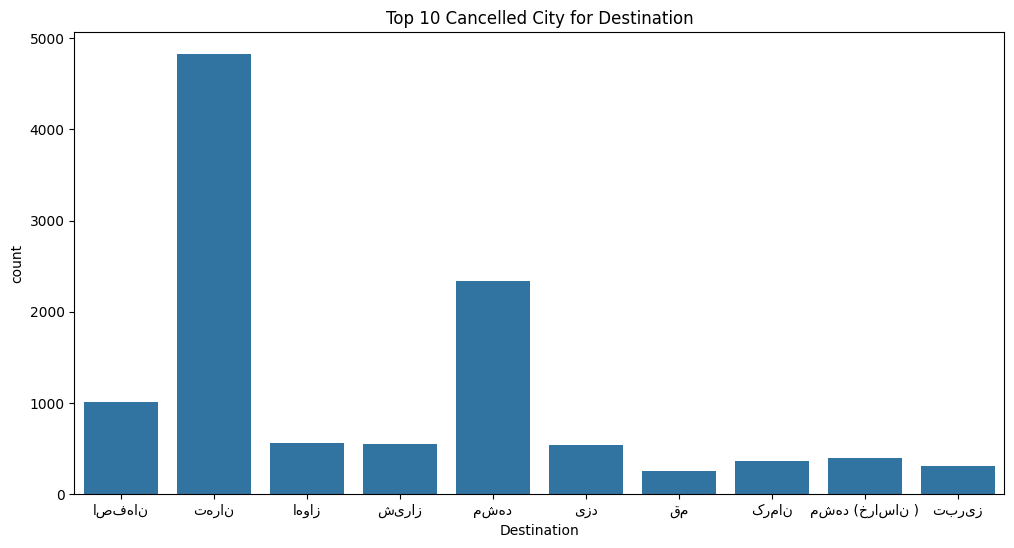

In [ ]:
# Get the top 10 cities based on the cancellation count
top_cities = df['To'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 cities
df_top_cities = df[df['To'].isin(top_cities)]

plt.figure(figsize=(12,6))
sns.countplot(
    data=df_top_cities[df_top_cities['Cancel']==1],
    x='To'
)
plt.title('Top 10 Cancelled City for Destination')
plt.xlabel('Destination')

Top 10 Cancelled City for Destination
1. تهران = Tehran
2. مشهد = Mashhad
3. اصفهان = Isfahan
4. اهواز = اهواز
5. شیراز = Shiraz
6. یزد = Yazd
7. مشهد (خراسان )	= Mashhad
8. کرمان = Kerman
9. تبریز = Tabriz
10. بندرعباس = Bandar Abbas

###Split Data

In [ ]:
from sklearn.model_selection import train_test_split

cols = ['Vehicle', 'Cancel','DepartureTime','Created','BillID','TicketID','From','To']
feature = df.drop(columns = cols)
target = df['Cancel']

In [ ]:
# First splitting: pretrain and test
feature_pretrain, feature_test, target_pretrain, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# Second splitting: train and validation
feature_train, feature_validation, target_train, target_validation = train_test_split(feature_pretrain, target_pretrain, test_size=0.20, random_state=42)

##Modelling

###Train and Validation test

In [ ]:
Model = [
 ('XGBoost', XGBClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier(random_state=42)),
 ('Random Forest', RandomForestClassifier(random_state=42))
]

In [ ]:
# result on training data
result_train = []
for name, model in Model:
  model.fit(feature_train, target_train)
  y_pred_train_model = model.predict(feature_validation)
  accuracy = accuracy_score(target_validation, y_pred_train_model)
  precision = precision_score(target_validation, y_pred_train_model)
  recall = recall_score(target_validation, y_pred_train_model)
  f1 = f1_score(target_validation, y_pred_train_model)
  result_train.append((name, accuracy, precision, recall, f1))

comparison_df_train = pd.DataFrame(result_train, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Training Data Results:")
print(comparison_df_train)
print("----------------------")

results_train = []
for name, model in Model:
  y_pred_test_model = model.predict(feature_test)
  accuracy = accuracy_score(target_test, y_pred_test_model)
  precision = precision_score(target_test, y_pred_test_model)
  recall = recall_score(target_test, y_pred_test_model)
  f1 = f1_score(target_test, y_pred_test_model)
  results_train.append((name, accuracy, precision, recall, f1))

comparison_df_train = pd.DataFrame(results_train, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Validation Data Results:")
print(comparison_df_train)

Training Data Results:
           Model  Accuracy  Precision    Recall  F1 Score
0        XGBoost  0.981068   0.986155  0.889247  0.935197
1            KNN  0.888696   0.752959  0.409988  0.530900
2  Decision Tree  0.974386   0.918318  0.914619  0.916465
3  Random Forest  0.981192   0.972668  0.902940  0.936508
----------------------
Validation Data Results:
           Model  Accuracy  Precision    Recall  F1 Score
0        XGBoost  0.981884   0.985606  0.893638  0.937372
1            KNN  0.891947   0.777358  0.403263  0.531042
2  Decision Tree  0.975994   0.924901  0.916150  0.920505
3  Random Forest  0.982032   0.973039  0.906688  0.938693


The overall training and validation results are good, and there is no occurrence of overfitting or underfitting in the model. The evaluation metrics, specifically recall, indicate that the models fit well with the dataset, except for the KNN model. Therefore, there is no need to include hyperparameters to lighten the computations.

##Hyperparameter

###XGBoost Model

In [ ]:
# Define the XGBoost model
model = XGBClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 150]
}

In [ ]:
# Perform grid search to find the best hyperparameters
# imbalanced data, use recall to avoid wrong negative prediction
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
grid_search.fit(feature_pretrain,target_pretrain.values.ravel())

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'n_estimators': [50, 100, 150]}, scoring='recall')

In [ ]:
# the compact results from pretrain
cv_result = pd.DataFrame(grid_search.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
2  {'n_estimators': 150}         0.900490                1
1  {'n_estimators': 100}         0.896163                2
0   {'n_estimators': 50}         0.890776                3

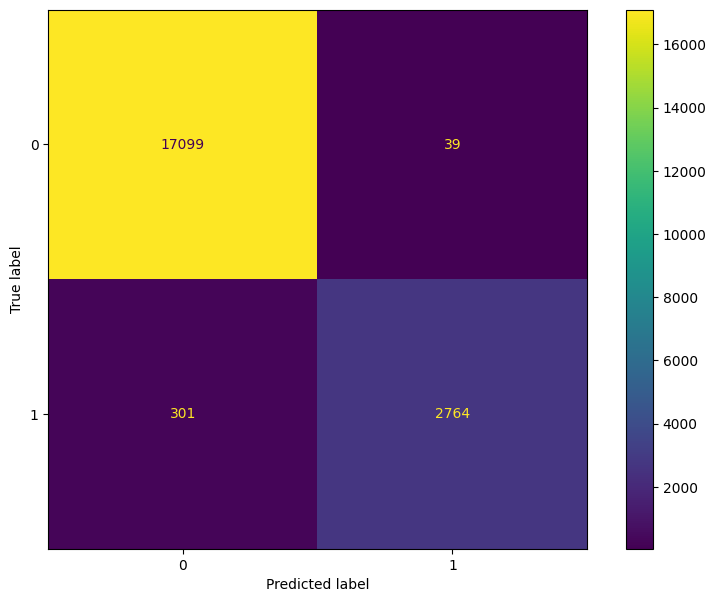

In [ ]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
target_pred = grid_search.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
target_pred = grid_search.best_estimator_.predict(feature_test)
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17138
           1       0.99      0.90      0.94      3065

    accuracy                           0.98     20203
   macro avg       0.98      0.95      0.97     20203
weighted avg       0.98      0.98      0.98     20203



Based on the provided classification report, the recall metric shows good results. Specifically focusing on recall (1), which yields 0.9, indicating a favorable outcome with only a small amount of cancellation predictions being incorrect.

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(feature_pretrain,target_pretrain.values.ravel())

DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [None, 10, 20, 30],  # Maksimum kedalaman pohon
    'criterion': ['gini', 'entropy', 'log_loss']
}

# note: we use recall
dt_clf_gridcv = GridSearchCV(dt, parameters, cv=5, scoring='recall')
dt_clf_gridcv.fit(feature_pretrain, target_pretrain)

CPU times: user 6.42 s, sys: 5.31 ms, total: 6.42 s
Wall time: 6.44 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30]},
             scoring='recall')

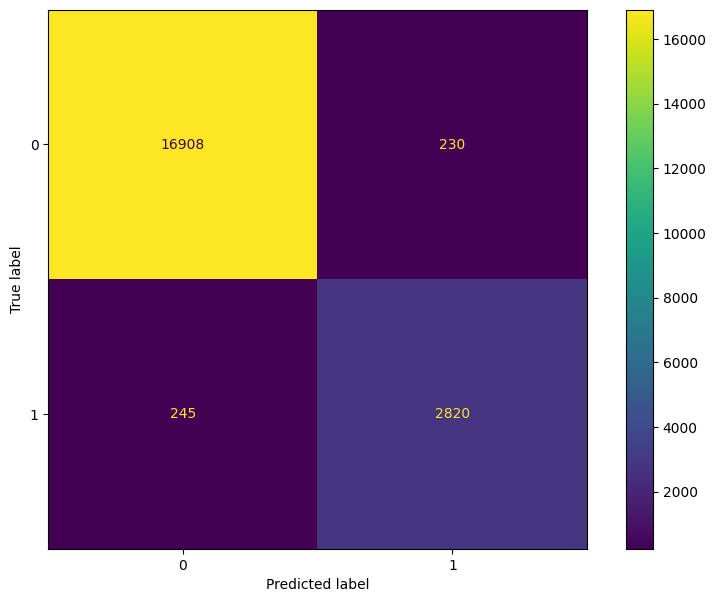

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
target_pred = dt_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_pred = dt_clf_gridcv.best_estimator_.predict(feature_test)
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17138
           1       0.92      0.92      0.92      3065

    accuracy                           0.98     20203
   macro avg       0.96      0.95      0.95     20203
weighted avg       0.98      0.98      0.98     20203



Based on the provided classification report, the recall metric shows good results. Specifically focusing on recall (1), which yields 0.92, indicating a favorable outcome with only a small amount of cancellation predictions being incorrect.

###Random Forest

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(feature_train, target_train.values.ravel())

CPU times: user 1min 13s, sys: 50.7 ms, total: 1min 13s
Wall time: 1min 14s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
24  {'max_depth': 5, 'n_estimators': 50}         0.886043                1
23  {'max_depth': 5, 'n_estimators': 40}         0.884303                2
22  {'max_depth': 5, 'n_estimators': 30}         0.882665                3
21  {'max_depth': 5, 'n_estimators': 20}         0.860138                4
20  {'max_depth': 5, 'n_estimators': 10}         0.802190                5
19  {'max_depth': 4, 'n_estimators': 50}         0.681280                6
17  {'max_depth': 4, 'n_estimators': 30}         0.678206                7
18  {'max_depth': 4, 'n_estimators': 40}         0.665820                8
15  {'max_depth': 4, 'n_estimators': 10}         0.627328                9
16  {'max_depth': 4, 'n_estimators': 20}         0.595176               10
12  {'max_depth': 3, 'n_estimators': 30}         0.214290               11
13  {'max_depth': 3, 'n_estimators': 40}         0.092969               12
10  {'max_depth': 3, 'n_estimators': 10}         0.091122               13
14  {'max_depth': 3, 'n_estimators': 50}         0.088560               14
11  {'max_depth': 3, 'n_estimators': 20}         0.006244               15
9   {'max_depth': 2, 'n_estimators': 50}         0.000000               16
8   {'max_depth': 2, 'n_estimators': 40}         0.000000               16
7   {'max_depth': 2, 'n_estimators': 30}         0.000000               16
6   {'max_depth': 2, 'n_estimators': 20}         0.000000               16
5   {'max_depth': 2, 'n_estimators': 10}         0.000000               16
4   {'max_depth': 1, 'n_estimators': 50}         0.000000               16
3   {'max_depth': 1, 'n_estimators': 40}         0.000000               16
2   {'max_depth': 1, 'n_estimators': 30}         0.000000               16
1   {'max_depth': 1, 'n_estimators': 20}         0.000000               16
0   {'max_depth': 1, 'n_estimators': 10}         0.000000               16

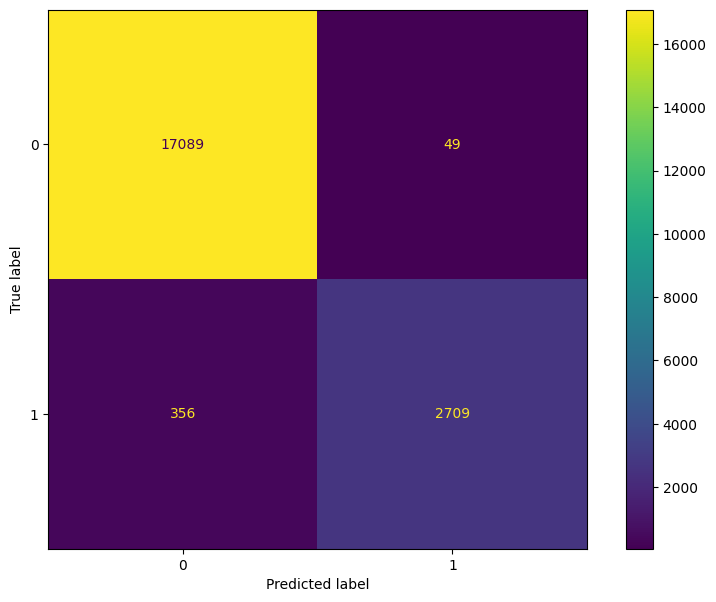

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17138
           1       0.98      0.88      0.93      3065

    accuracy                           0.98     20203
   macro avg       0.98      0.94      0.96     20203
weighted avg       0.98      0.98      0.98     20203



Based on the provided classification report, the recall metric shows good results. Specifically focusing on recall (1), which yields 0.88, indicating a favorable outcome with only a small amount of cancellation predictions being incorrect.

#After PreProcessing Data

##Data Preprocessing

###One Hot Encoding

In [ ]:
dummies = pd.get_dummies(df['Vehicle'],prefix='Vehicle')
df_new = pd.concat([df, dummies], axis=1)

In [ ]:
one_hot = ['Vehicle_Bus', 'Vehicle_InternationalPlane', 'Vehicle_Plane', 'Vehicle_Train']
for i in one_hot:
  df_new[i] = df_new[i].astype(int)

In [ ]:
df_new.head()

Created       DepartureTime    BillID  TicketID  \
0 2022-10-23 09:38:49.110 2022-11-02 23:59:00  39710203   1091777   
1 2022-08-15 14:51:43.160 2022-08-18 04:15:00  38689463   1070902   
2 2022-09-20 17:25:27.250 2022-09-21 11:00:00  39245173   7624237   
3 2022-06-25 11:32:53.980 2022-06-26 08:30:00  37957585   2867547   
4 2022-06-01 11:30:53.633 2022-06-02 23:00:00  37584530   7212559   

   ReserveStatus  Gender    Price  CouponDiscount   From                  To  \
0              5       1  6600000           34425  گرگان               تهران   
1              5       1  9500000               0   مشهد               تهران   
2              3       0  2000000               0  شیراز               اهواز   
3              2       0    40000               0  تبریز                جلفا   
4              3       1  1130000               0  تهران  نجف آباد (اصفهان )   

   ...  Cancel  From_encoded To_encoded  Days_Difference  DepartureMonth  \
0  ...       0           307         85               10              11   
1  ...       0           234         85                2               8   
2  ...       0           182         41                0               9   
3  ...       0            79         90                0               6   
4  ...       0            85        256                1               6   

   coupondiscount_percent  Vehicle_Bus  Vehicle_InternationalPlane  \
0                0.521591            0                           0   
1                0.000000            0                           0   
2                0.000000            1                           0   
3                0.000000            0                           0   
4                0.000000            1                           0   

   Vehicle_Plane  Vehicle_Train  
0              1              0  
1              1              0  
2              0              0  
3              0              1  
4              0              0  

[5 rows x 23 columns]

###Outlier Handling

In [ ]:
features = ['ReserveStatus', 'Gender','Price', 'CouponDiscount', 'Domestic', 'TripReason', 'Cancel',
            'Vehicle_Bus', 'Vehicle_InternationalPlane', 'Vehicle_Plane', 'Vehicle_Train']

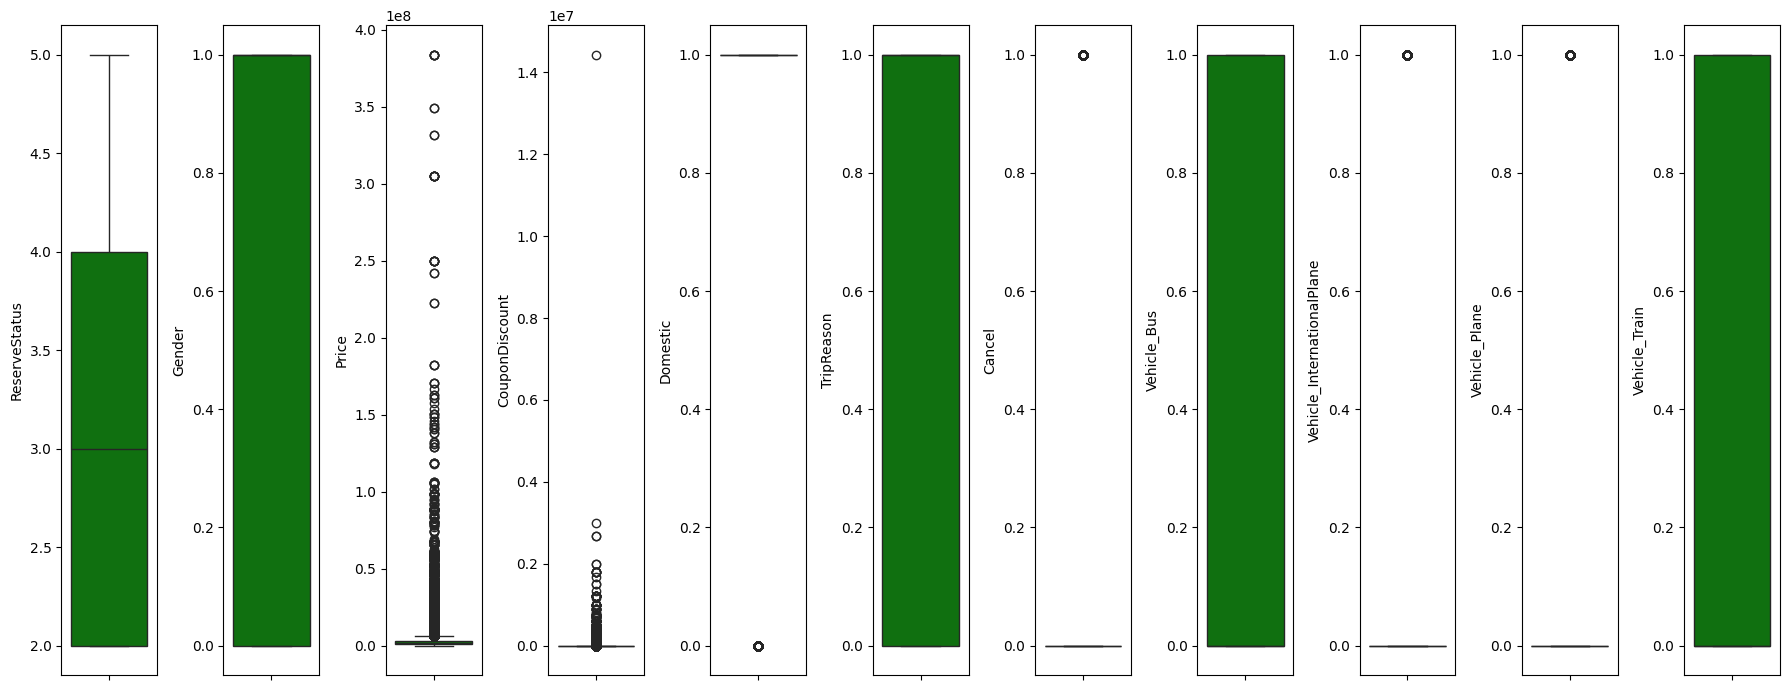

In [ ]:
plt.figure(figsize=(18, 7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=features[i],data=df_new,color='green')
  plt.tight_layout()

In [ ]:
outlier_features = ['ReserveStatus', 'Price', 'CouponDiscount']
for i in outlier_features:
  df_new[i] = np.log(df_new[i]+1)

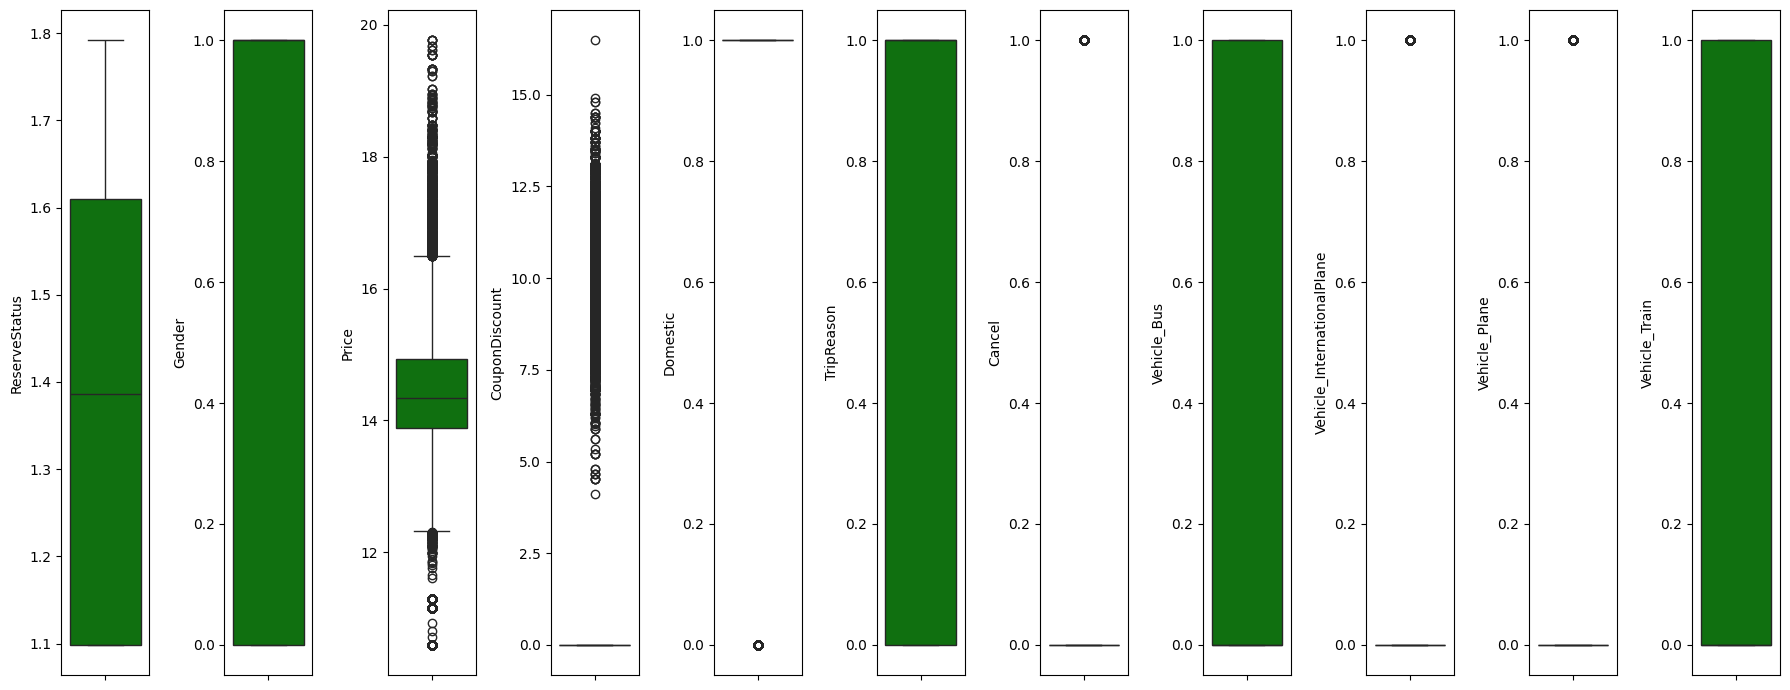

In [ ]:
plt.figure(figsize=(18, 7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=features[i],data=df_new,color='green')
  plt.tight_layout()

###Reducing Features

In [ ]:
# Reducing features. Because already have 'Domestic' and 'Vehicle_Plane' Column, that can represents 'Vehicle_InternationalPlane'
# Use boolean indexing to set 'Vehicle_Plane' to 1 where 'Vehicle_InternationalPlane' is 1
df_new.loc[df_new['Vehicle_InternationalPlane'] == 1, 'Vehicle_Plane'] = 1

# Drop the 'Vehicle_InternationalPlane' column
df_new = df_new.drop(columns='Vehicle_InternationalPlane', axis=1)

###Feature Engineering

In [ ]:
# Combine 'From' and 'To' columns to create a list of all cities
all_cities = df_new['From'].tolist() + df_new['To'].tolist()

# Create a set of unique cities and convert it back to a list
unique_cities = list(set(all_cities))

city_encoder = LabelEncoder()

# Fit the encoder on the unique cities
city_encoder.fit(unique_cities)

# Transform the 'From' and 'To' columns in the training data
df_new['From_encoded'] = city_encoder.transform(df_new['From'])
df_new['To_encoded'] = city_encoder.transform(df_new['To'])

# Fill missing values with -1
df_new['From_encoded'].fillna(-1, inplace=True)
df_new['To_encoded'].fillna(-1, inplace=True)

# Transform the 'From' and 'To' columns in the validation data
df_new['From_encoded'] = city_encoder.transform(df_new['From'])
df_new['To_encoded'] = city_encoder.transform(df_new['To'])

# Fill missing values with -1
df_new['From_encoded'].fillna(-1, inplace=True)
df_new['To_encoded'].fillna(-1, inplace=True)

In [ ]:
#calculate days difference
df_new['DepartureTime'] = pd.to_datetime(df_new['DepartureTime'])
df_new['Created'] = pd.to_datetime(df_new['Created'])
df_new['Days_Difference'] = (df_new['DepartureTime'] - df_new['Created']).dt.days

In [ ]:
#add family member feature
grouped_data = df_new.groupby(['BillID','DepartureTime']).agg(
    family_member = ('DepartureTime','count')
    )
df_new = pd.merge(df_new, grouped_data, on='BillID', how='left')

In [ ]:
grouped_data

family_member
BillID   DepartureTime                     
35910845 2022-01-31 23:59:00              1
35911043 2022-02-01 15:30:00              3
35911097 2022-01-31 23:59:00              1
35911108 2022-02-05 16:00:00              1
35911259 2022-02-09 18:45:00              1
...                                     ...
39839874 2022-11-04 15:10:00              1
39840038 2022-11-03 10:00:00              1
39840051 2022-11-04 22:05:00              1
39840057 2022-11-09 15:40:00              2
39840147 2022-11-04 23:59:00              1

[74066 rows x 1 columns]

In [ ]:
df_new[df_new['BillID']==37670819]

Created       DepartureTime    BillID  TicketID  \
869    2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822020   
5180   2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822010   
6003   2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822027   
19267  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822029   
20522  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822017   
25273  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822036   
30104  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822023   
32475  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822018   
41403  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822007   
42719  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822033   
44436  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822030   
45717  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822025   
54475  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822024   
58866  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822013   
61119  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822008   
65349  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822019   
68965  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822026   
70644  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822016   
74747  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822012   
85662  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822011   
89488  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822031   
93007  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822035   
96109  2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822034   
103857 2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822015   
105506 2022-06-06 20:26:25.580 2022-06-18 05:20:00  37670819   2822009   

        ReserveStatus  Gender      Price  CouponDiscount   From  To  ...  \
869          1.098612       1  11.156265             0.0  تهران  قم  ...   
5180         1.098612       1  11.156265             0.0  تهران  قم  ...   
6003         1.098612       0  11.156265             0.0  تهران  قم  ...   
19267        1.098612       0  11.156265             0.0  تهران  قم  ...   
20522        1.098612       1  11.156265             0.0  تهران  قم  ...   
25273        1.098612       0  11.156265             0.0  تهران  قم  ...   
30104        1.098612       1  11.156265             0.0  تهران  قم  ...   
32475        1.098612       1  11.156265             0.0  تهران  قم  ...   
41403        1.098612       0  11.156265             0.0  تهران  قم  ...   
42719        1.098612       0  11.156265             0.0  تهران  قم  ...   
44436        1.098612       1  11.156265             0.0  تهران  قم  ...   
45717        1.098612       1  11.156265             0.0  تهران  قم  ...   
54475        1.098612       1  11.156265             0.0  تهران  قم  ...   
58866        1.098612       0  11.156265             0.0  تهران  قم  ...   
61119        1.098612       0  11.156265             0.0  تهران  قم  ...   
65349        1.098612       0  11.156265             0.0  تهران  قم  ...   
68965        1.098612       0  11.156265             0.0  تهران  قم  ...   
70644        1.098612       0  11.156265             0.0  تهران  قم  ...   
74747        1.098612       0  11.156265             0.0  تهران  قم  ...   
85662        1.098612       0  11.156265             0.0  تهران  قم  ...   
89488        1.098612       1  11.156265             0.0  تهران  قم  ...   
93007        1.098612       1  11.156265             0.0  تهران  قم  ...   
96109        1.098612       1  11.156265             0.0  تهران  قم  ...   
103857       1.098612       0  11.156265             0.0  تهران  قم  ...   
105506       1.098612       1  11.156265             0.0  تهران  قم  ...   

        Cancel  From_encoded To_encoded  Days_Difference  DepartureMonth  \
869          0            85        211      

In [ ]:
#Group data by "BillId" and count the number of distinct values in "TicketId" column
ticket_counts = df_new.groupby('BillID')['TicketID'].nunique().reset_index()
#Rename the column
ticket_counts = ticket_counts.rename(columns={'TicketID': 'Ticket_Count'})
#Merge the ticket counts with the original data
df_new = pd.merge(df_new, ticket_counts, on='BillID', how='left')

In [ ]:
ticket_counts

BillID  Ticket_Count
0      35910845             1
1      35911043             3
2      35911097             1
3      35911108             1
4      35911259             1
...         ...           ...
72354  39839874             1
72355  39840038             1
72356  39840051             1
72357  39840057             2
72358  39840147             1

[72359 rows x 2 columns]

###Imbalanced Data Handling

In [ ]:
df_new['Cancel'].value_counts()

0    92300
1    16343
Name: Cancel, dtype: int64

In [ ]:
feature = df_new.drop(columns='Cancel', axis=1)
target = df_new['Cancel']

In [ ]:
#data imbalanced, we will do undersampling. Because we want to focus on cancellation (1), so we dont need to change our cancellation data(1)
from imblearn import under_sampling, over_sampling

feature_under, target_under = under_sampling.RandomUnderSampler().fit_resample(feature,target)

In [ ]:
df_undersampling = pd.concat([feature_under, target_under], axis=1)

In [ ]:
df_undersampling

Created       DepartureTime    BillID  TicketID  \
0     2022-07-10 02:10:31.453 2022-07-11 10:20:00  38192380   2893259   
1     2022-10-29 18:26:14.627 2022-11-06 08:20:00  39787871   3085188   
2     2022-05-26 16:39:06.087 2022-06-04 04:50:00  37488439   2802935   
3     2022-10-03 18:25:19.513 2022-10-07 13:30:00  39471696   7681837   
4     2022-05-14 15:30:28.127 2022-06-01 18:25:00  37327585   2781697   
...                       ...                 ...       ...       ...   
32681 2022-09-08 04:28:49.513 2022-09-29 23:25:00  39062550   2996210   
32682 2022-10-31 09:10:22.010 2022-11-02 00:40:00  39804609   3087347   
32683 2022-11-01 08:39:50.493 2022-11-01 13:00:00  39817292   7776074   
32684 2022-09-21 18:28:14.753 2022-09-25 11:25:00  39268486   2332529   
32685 2022-09-29 12:55:26.147 2022-10-08 21:00:00  39406114   3038589   

       ReserveStatus  Gender      Price  CouponDiscount      From      To  \
0           1.098612       1  11.156265             0.0     تهران      قم   
1           1.098612       0  13.709595             0.0     تهران    ساری   
2           1.098612       1  11.156265             0.0        قم   تهران   
3           1.386294       1  14.408838             0.0    اصفهان   کرمان   
4           1.098612       0  15.073403             0.0     شیراز   تهران   
...              ...     ...        ...             ...       ...     ...   
32681       1.609438       1  14.936700             0.0      مشهد   تهران   
32682       1.609438       1  14.124833             0.0    شاهرود    مشهد   
32683       1.791759       1  14.220976             0.0  بندرعباس  عسلويه   
32684       1.791759       0  16.185193             0.0     کرمان    مشهد   
32685       1.609438       0  14.908608             0.0     تهران    مشهد   

       ...  To_encoded  Days_Difference DepartureMonth  \
0      ...         211                1              7   
1      ...         148                7             11   
2      ...          85                8              6   
3      ...         293                3             10   
4      ...          85               18              6   
...    ...         ...              ...            ...   
32681  ...          85               21              9   
32682  ...         234                1             11   
32683  ...         191                0             11   
32684  ...         234                3              9   
32685  ...         234                9             10   

       coupondiscount_percent  Vehicle_Bus  Vehicle_Plane  Vehicle_Train  \
0                         0.0            0              0              1   
1                         0.0            0              0              1   
2                         0.0            0              0              1   
3                         0.0            1              0              0   
4                         0.0            0              0              1   
...                       ...          ...            ...            ...   
32681                     0.0            0              0              1   
32682                     0.0            0              0              1   
32683                     0.0            1              0              0   
32684                     0.0            0              1              0   
32685                     0.0            0              0              1   

       family_member  Ticket_Count  Cancel  
0                  1             1       0  
1                  3             3       0  
2                  4             4       0  
3                  2             2       0  
4                  2             2       0  
...              ...           ...     ...  
32681              1             1       1  
32682              1             1       1  
32683              1             1       1  
32684              3             3       1  
32685              1             1       1  

[32686 rows x 24 columns]

In [ ]:
df_undersampling['Cancel'].value_counts()

0    16343
1    16343
Name: Cancel, dtype: int64

In [ ]:
print("Feature shape:", feature_under.shape)
print("Target shape:", target_under.shape)

Feature shape: (32686, 23)
Target shape: (32686,)


In [ ]:
#Undersampling Result
print(pd.Series(target_under).value_counts())

0    16343
1    16343
Name: Cancel, dtype: int64


###Split Data

In [ ]:
#Split Train Test
from sklearn.model_selection import train_test_split

cols = ['Vehicle', 'Cancel','From','To','BillID','TicketID','Created','DepartureTime']
feature = df_undersampling.drop(columns = cols)
target = df_undersampling['Cancel']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(feature)
X_std = scaler.transform(feature)

In [ ]:
# First splitting: pretrain and test
feature_pretrain, feature_test, target_pretrain, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# Second splitting: train and validation
feature_train, feature_validation, target_train, target_validation = train_test_split(feature_pretrain, target_pretrain, test_size=0.20, random_state=42)

###Multicolinearity Study

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature  vif_score
1            ReserveStatus   1.480187
2                   Gender   1.065076
3                    Price   1.854148
4           CouponDiscount   1.242743
5                 Domestic   1.090105
6               TripReason   1.429862
7             From_encoded   1.060850
8               To_encoded   1.061196
9          Days_Difference   1.510625
10          DepartureMonth   1.031836
11  coupondiscount_percent   1.200879
12             Vehicle_Bus        inf
13           Vehicle_Plane        inf
14           Vehicle_Train        inf
15           family_member   4.956685
16            Ticket_Count   5.217831

#####Correlation Heatmap

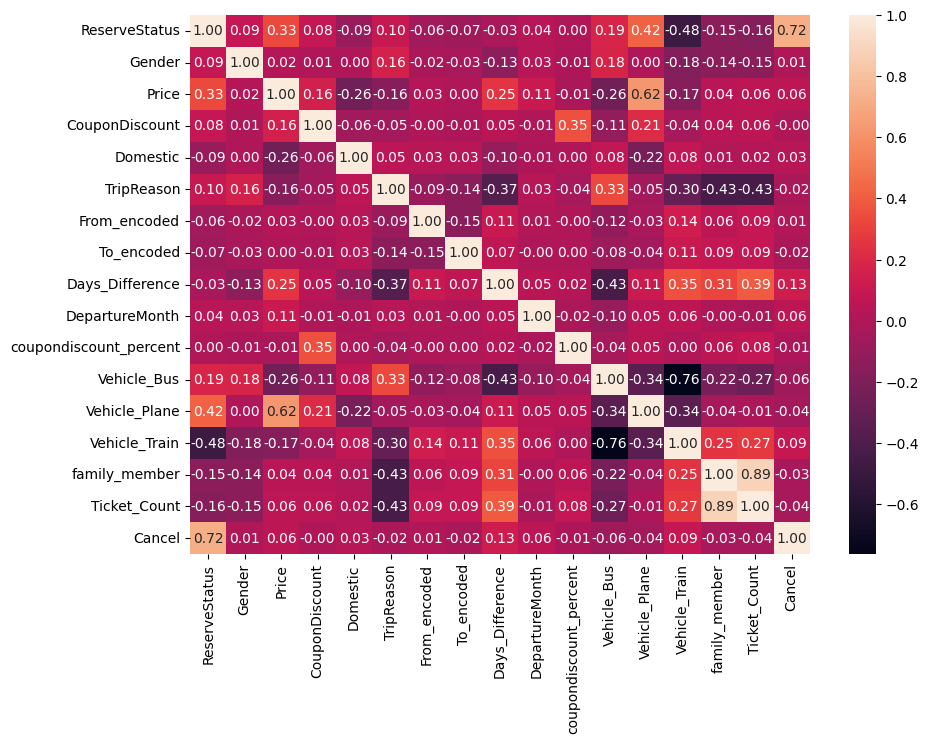

In [ ]:
# heatmap correlation
train = pd.concat([feature, target], axis=1)
corr = train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

There are two correlated features, 'family_member' and 'Ticket_Count', based on the correlation heatmap. According to the VIF (Variance Inflation Factor) scores, 'Ticket_Count' has a higher VIF than family_member. Therefore, it is recommended to drop 'Ticket_Count'.

In [ ]:
feature_pretrain = feature_pretrain.drop(columns='Ticket_Count', axis=1)
feature_test = feature_test.drop(columns='Ticket_Count', axis=1)
feature_train = feature_train.drop(columns='Ticket_Count', axis=1)
feature_validation = feature_validation.drop(columns='Ticket_Count', axis=1)

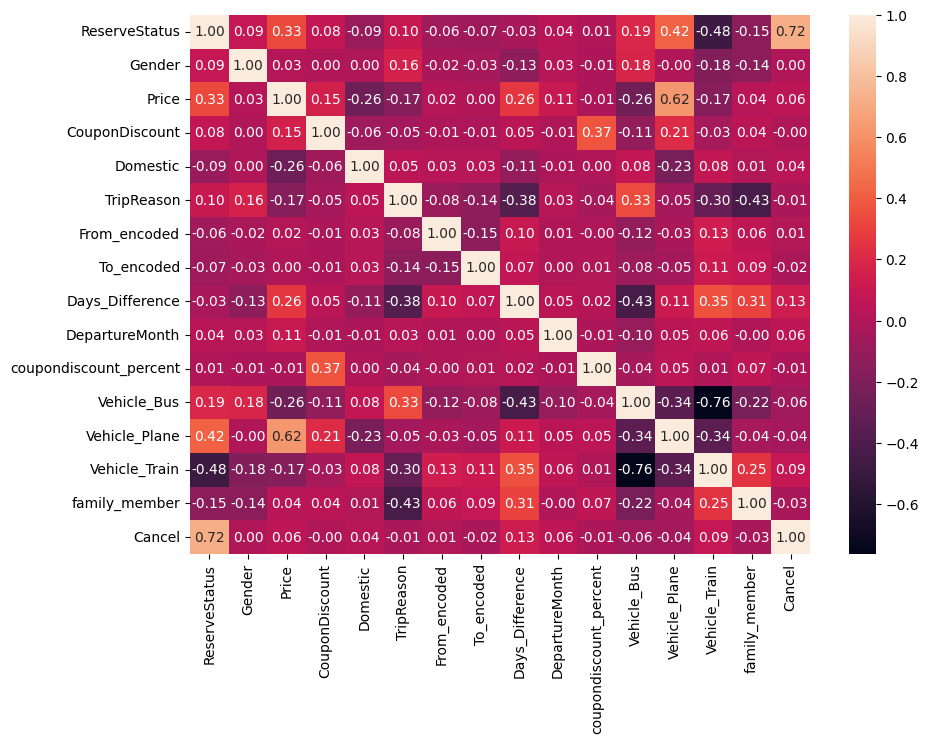

In [ ]:
# recheck heatmap correlation
train = pd.concat([feature_pretrain, target_pretrain], axis=1)
corr = train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

##Modelling

###Train and Validation test

In [ ]:
Model = [
 ('XGBoost', XGBClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier(random_state=42)),
 ('Random Forest', RandomForestClassifier(random_state=42))
]

In [ ]:
# result on training data
result_train = []
for name, model in Model:
  model.fit(feature_train, target_train)
  y_pred_train_model = model.predict(feature_validation)
  accuracy = accuracy_score(target_validation, y_pred_train_model)
  precision = precision_score(target_validation, y_pred_train_model)
  recall = recall_score(target_validation, y_pred_train_model)
  f1 = f1_score(target_validation, y_pred_train_model)
  result_train.append((name, accuracy, precision, recall, f1))

comparison_df_train = pd.DataFrame(result_train, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Training Data Results:")
print(comparison_df_train)
print("----------------------")

results_train = []
for name, model in Model:
  y_pred_test_model = model.predict(feature_test)
  accuracy = accuracy_score(target_test, y_pred_test_model)
  precision = precision_score(target_test, y_pred_test_model)
  recall = recall_score(target_test, y_pred_test_model)
  f1 = f1_score(target_test, y_pred_test_model)
  results_train.append((name, accuracy, precision, recall, f1))

comparison_df_train = pd.DataFrame(results_train, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Validation Data Results:")
print(comparison_df_train)

Training Data Results:
           Model  Accuracy  Precision    Recall  F1 Score
0        XGBoost  0.954493    0.95258  0.956936  0.954753
1            KNN  0.667495    0.65338  0.718369  0.684335
2  Decision Tree  0.952008    0.94555  0.959604  0.952525
3  Random Forest  0.958891    0.96026  0.957698  0.958977
----------------------
Validation Data Results:
           Model  Accuracy  Precision    Recall  F1 Score
0        XGBoost  0.957785   0.956294  0.958655  0.957473
1            KNN  0.669777   0.656268  0.701018  0.677905
2  Decision Tree  0.955491   0.949147  0.961740  0.955402
3  Random Forest  0.957020   0.961634  0.951250  0.956414


The overall training and validation results are good, and there is no occurrence of overfitting or underfitting in the model. The evaluation metrics, specifically accuracy, indicate that the models fit well with the dataset, except for the KNN model although it has improved from the baseline model. Therefore, there is no need to include hyperparameters to lighten the computations.

##Hyperparameter

###XGBoost Model

In [ ]:
# Define the XGBoost model
model = XGBClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 150]
}

In [ ]:
# Perform grid search to find the best hyperparameters
# imbalanced data, use recall to avoid wrong negative prediction
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(feature_pretrain,target_pretrain.values.ravel())

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'n_estimators': [50, 100, 150]}, scoring='accuracy')

In [ ]:
# the compact results from pretrain
cv_result = pd.DataFrame(grid_search.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
2  {'n_estimators': 150}         0.958582                1
1  {'n_estimators': 100}         0.957893                2
0   {'n_estimators': 50}         0.954987                3

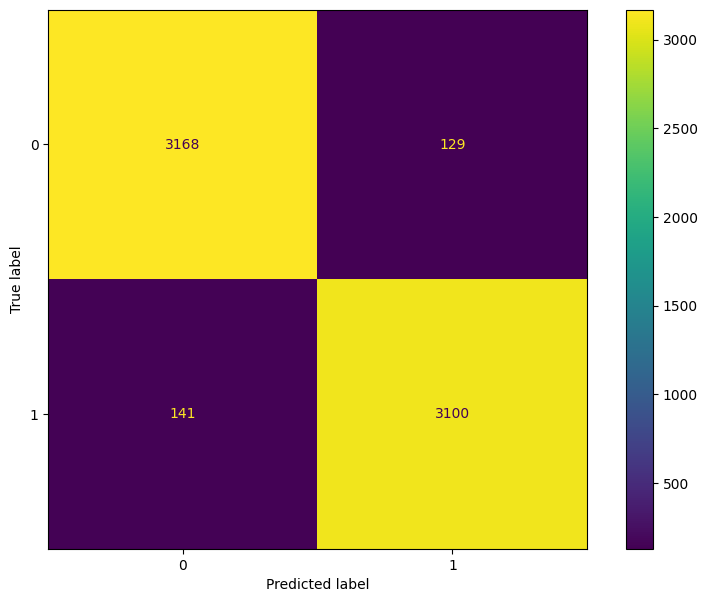

In [ ]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
target_pred = grid_search.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
target_pred = grid_search.best_estimator_.predict(feature_test)
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3297
           1       0.96      0.96      0.96      3241

    accuracy                           0.96      6538
   macro avg       0.96      0.96      0.96      6538
weighted avg       0.96      0.96      0.96      6538



Based on the classification report, the accuracy metric shows excellent results, yielding 0.96, indicating an overall good outcome in terms of prediction accuracy.

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(feature_pretrain,target_pretrain.values.ravel())

DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [None, 10, 20, 30],  # Maksimum kedalaman pohon
    'criterion': ['gini', 'entropy', 'log_loss']
}

# note: we use recall
dt_clf_gridcv = GridSearchCV(dt, parameters, cv=5, scoring='accuracy')
dt_clf_gridcv.fit(feature_pretrain, target_pretrain)

CPU times: user 2.19 s, sys: 0 ns, total: 2.19 s
Wall time: 2.19 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30]},
             scoring='accuracy')

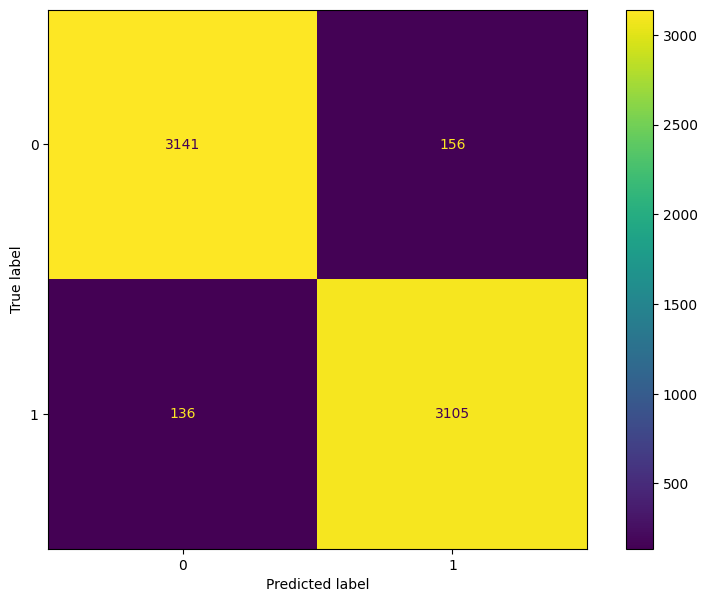

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
target_pred = dt_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_pred = dt_clf_gridcv.best_estimator_.predict(feature_test)
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3297
           1       0.95      0.96      0.96      3241

    accuracy                           0.96      6538
   macro avg       0.96      0.96      0.96      6538
weighted avg       0.96      0.96      0.96      6538



Based on the classification report, the accuracy metric shows excellent results, yielding 0.95, indicating an overall good outcome in terms of prediction accuracy.

###Random Forest

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='accuracy')
rf_clf_gridcv.fit(feature_train, target_train.values.ravel())

CPU times: user 28.2 s, sys: 39.7 ms, total: 28.2 s
Wall time: 28.4 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='accuracy')

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
23  {'max_depth': 5, 'n_estimators': 40}         0.946792                1
22  {'max_depth': 5, 'n_estimators': 30}         0.945932                2
24  {'max_depth': 5, 'n_estimators': 50}         0.945310                3
21  {'max_depth': 5, 'n_estimators': 20}         0.944880                4
20  {'max_depth': 5, 'n_estimators': 10}         0.943637                5
18  {'max_depth': 4, 'n_estimators': 40}         0.940578                6
17  {'max_depth': 4, 'n_estimators': 30}         0.938761                7
19  {'max_depth': 4, 'n_estimators': 50}         0.937231                8
16  {'max_depth': 4, 'n_estimators': 20}         0.935654                9
15  {'max_depth': 4, 'n_estimators': 10}         0.935176               10
11  {'max_depth': 3, 'n_estimators': 20}         0.931638               11
12  {'max_depth': 3, 'n_estimators': 30}         0.930730               12
13  {'max_depth': 3, 'n_estimators': 40}         0.930395               13
14  {'max_depth': 3, 'n_estimators': 50}         0.929965               14
6   {'max_depth': 2, 'n_estimators': 20}         0.928339               15
9   {'max_depth': 2, 'n_estimators': 50}         0.926810               16
8   {'max_depth': 2, 'n_estimators': 40}         0.926571               17
7   {'max_depth': 2, 'n_estimators': 30}         0.926571               18
1   {'max_depth': 1, 'n_estimators': 20}         0.926284               19
2   {'max_depth': 1, 'n_estimators': 30}         0.925232               20
4   {'max_depth': 1, 'n_estimators': 50}         0.925089               21
3   {'max_depth': 1, 'n_estimators': 40}         0.924515               22
0   {'max_depth': 1, 'n_estimators': 10}         0.922651               23
10  {'max_depth': 3, 'n_estimators': 10}         0.919974               24
5   {'max_depth': 2, 'n_estimators': 10}         0.860412               25

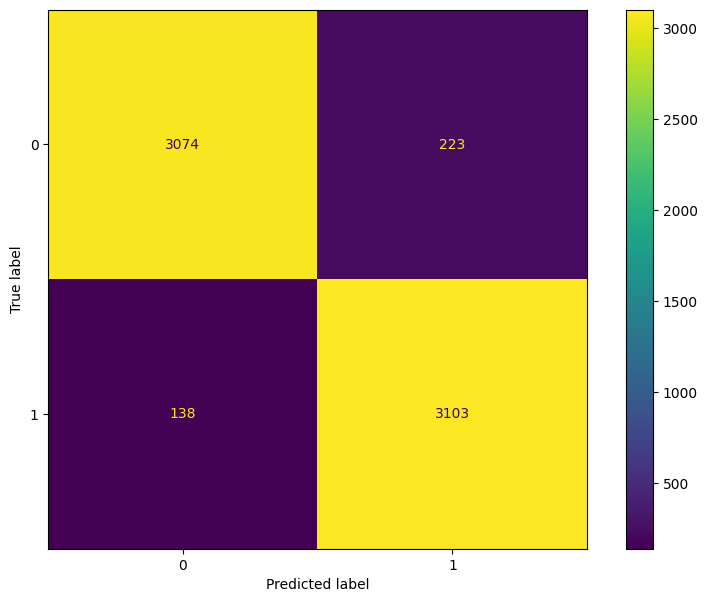

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3297
           1       0.93      0.96      0.95      3241

    accuracy                           0.94      6538
   macro avg       0.94      0.94      0.94      6538
weighted avg       0.95      0.94      0.94      6538



Based on the classification report, the accuracy metric shows excellent results, yielding 0.92, indicating an overall good outcome in terms of prediction accuracy.

##Conclusion

The dataset consists of 101,017 rows and 21 columns. It is imbalanced and contains missing values, duplicated rows, and outliers. I performed label encoding, one-hot encoding, and changed the data type for the features. After preprocessing, the data has 25 columns and 32,686 rows. I split the dataset into 80% pretraining data and 20% test data, further dividing the pretraining data into training and validation sets.

I chose XGBoost, KNN, Decision Tree, and Random Forest as models to predict travel ticket cancellations. From the baseline model, I obtained results for training and validation that were not significantly different, indicating that the model is suitable for the data, except for the KNN model. The best result from the baseline model was the Decision Tree. After preprocessing the data, the results for training and validation were also not significantly different, indicating that the model is suitable for the data. The best result after preprocessing the data was Random Forest with higher accuracy than Decision Tree baseline model.

From this research, we can conclude that the performance of tree-based models is better than that of non-tree-based models. Tree-based models perform well even without preprocessing the data, suggesting that tree-based models are more robust with the data.



##Business Recommendation

1. Tightening regulations on booking and cancellation processes aims to reduce cancellations.
2. Providing the option to reschedule for customers intending to cancel their travel tickets is essential.
3. We need to establish fixed departure schedules for each route to enhance the efficiency of the company's resources.
4. Offering travel options that allows customers to choose more cost-effective alternatives.
5. Promoting destinations with the highest demand helps decrease the likelihood of ticket cancellations.
